# Analyzing NYTbd Sample 3
<br>
This notebook is looking at the NYTbd Sample 3 content analyzed by ACCENT and PETRARCH2 to identify current limitations with PETRARCH2 and to try and devise solutions. 

In [1]:
# Setup Environment
from nltk.parse.corenlp import CoreNLPServer
from nltk.parse.corenlp import CoreNLPDependencyParser
from nltk.parse import CoreNLPParser

import pandas as pd

import pprint
import nltk

from nltk.tree import *
from IPython.display import display

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### Link to Java Server for Standford CoreNLP
<br>
java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -annotators "tokenize,ssplit,pos,lemma,parse,sentiment" -port 9000 -timeout 100000

In [2]:
# Connect to Server
parser = CoreNLPParser('http://localhost:9000')
depr = CoreNLPDependencyParser('http://localhost:9000')

#### Write Some Functions for Parsing Text

In [3]:
# Core Parser- save as df['parsed']
def core_parser(df, col):
    parse = []
    i = ""
    for i in range(len(df)):
        parse.append(i)
        parse[i] = next(parser.raw_parse(df[col].iloc[i]))
    return parse

# Dependency Parser- save as df['dep']
def dep_parser(df, col):
    dep = []
    i = ""
    for i in range(len(df)):
        dep.append(i)
        dep[i] = next(depr.raw_parse(df[col].iloc[i]))
    return dep

# For easy display of both parse trees, text, and code
def easy_read(corp, index_num):
    display(corp['parsed'].iloc[index_num])
    display(corp['dep'].iloc[index_num])
    display("Text = " + corp.iloc[index_num].loc['text'])
    display("Code = " + str(corp.iloc[index_num].loc['code']))
    
# function to display only constituency parse with POS tags with text and code
def parsed_output(corp, index_num):
    display(corp['parsed'].iloc[index_num])
    display("Text = " + corp.iloc[index_num].loc['text'])
    display("Code = " + str(corp.iloc[index_num].loc['code']))
    display("AID = " + str(corp.iloc[index_num].loc['aid']))
    
# function to display only dependency parse with text and code
def dependency_output(corp, index_num):
    display(corp['dep'].iloc[index_num])
    display("Text = " + corp.iloc[index_num].loc['text'])
    display("Code = " + str(corp.iloc[index_num].loc['code']))
    
# function to display constituency parse of a single sentence
def one_sentence_parser(text):
    output = next(parser.raw_parse(text))
    return output

## Read in NYTbd Sample 3 Data- ACCENT and PETRARCH2

In [4]:
accent3 = pd.read_stata("/Volumes/PartTime/Jonathan Bonaguro - Spring 2020/NYTbd sample 3/Accent_NYTbd_sample3.dta")
petrarch3 = pd.read_stata("/Volumes/PartTime/Jonathan Bonaguro - Spring 2020/NYTbd sample 3/Petrarch_NYTbd_sample3.dta")

In [5]:
# parse accent3 
%time accent3['parsed'] = core_parser(accent3, 'text')
accent3['dep'] = dep_parser(accent3, 'text')

CPU times: user 540 ms, sys: 58.2 ms, total: 598 ms
Wall time: 2min 49s


In [6]:
# parse petrarch3 
%time petrarch3['parsed'] = core_parser(petrarch3, 'text')
petrarch3['dep'] = dep_parser(petrarch3, 'text')

CPU times: user 91.4 ms, sys: 7.64 ms, total: 99 ms
Wall time: 5.3 s


## Subset Data by Event Coder

In [7]:
keys = list(['aid', 'code'])
accent3_index = accent3.set_index(keys).index
petrarch3_index = petrarch3.set_index(keys).index

# Produce df's of mutually exclusive events 
accent3_only = accent3[~accent3_index.isin(petrarch3_index)]
petrarch3_only = petrarch3[~petrarch3_index.isin(accent3_index)]

# Produce df's of same article, same coding
accent3_same_code = accent3[accent3_index.isin(petrarch3_index)]
petrarch3_same_code = petrarch3[petrarch3_index.isin(accent3_index)]

# sort values on AID and reset index 
accent3_only = accent3_only.sort_values('aid').reset_index(drop = True)
petrarch3_only = petrarch3_only.sort_values('aid').reset_index(drop = True)

accent3_same_code = accent3_same_code.sort_values('aid').reset_index(drop = True)
petrarch3_same_code = petrarch3_same_code.sort_values('aid').reset_index(drop = True)

## Look for errors in ACCENT and PETRARCH
<br>
Event codes: 140, 141, 143, 145, 1723, 181, 183, 1831, 186

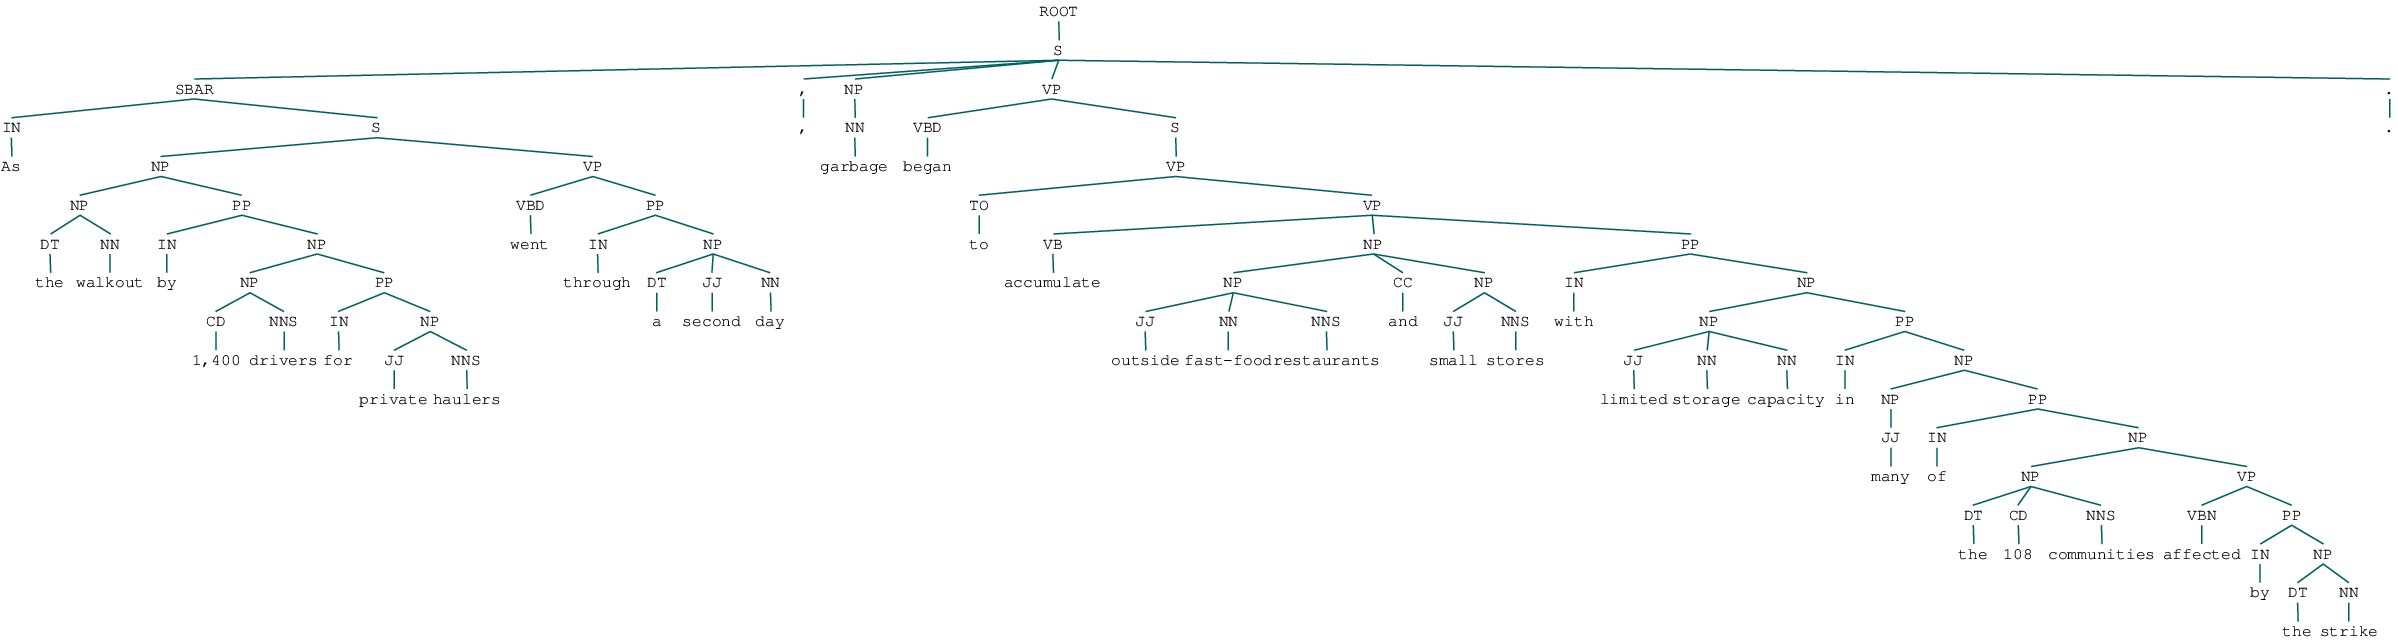

'Text = As the walkout by 1,400 drivers for private haulers went through a second day, garbage began to accumulate outside fast-food restaurants and small stores with limited storage capacity in many of the 108 communities affected by the strike.'

'Code = 141'

'AID = 22416840'

0

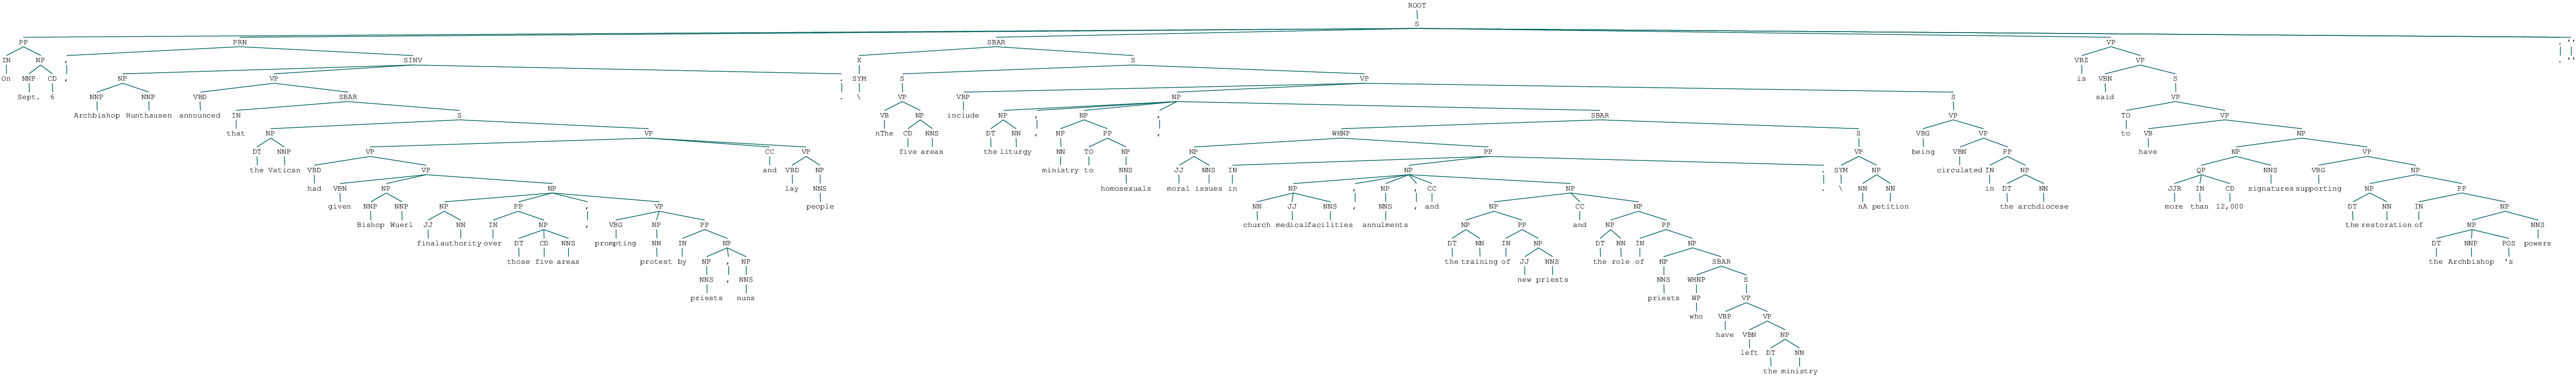

'Text = On Sept. 6, Archbishop Hunthausen announced that the Vatican had given Bishop Wuerl final authority over those five areas, prompting protest by priests, nuns and lay people.\\nThe five areas include the liturgy, ministry to homosexuals, moral issues in church medical facilities, annulments, and the training of new priests and the role of priests who have left the ministry.\\nA petition being circulated in the archdiocese is said to have more than 12,000 signatures supporting the restoration of the Archbishop\'s powers."'

'Code = 141'

'AID = 22779880'

1

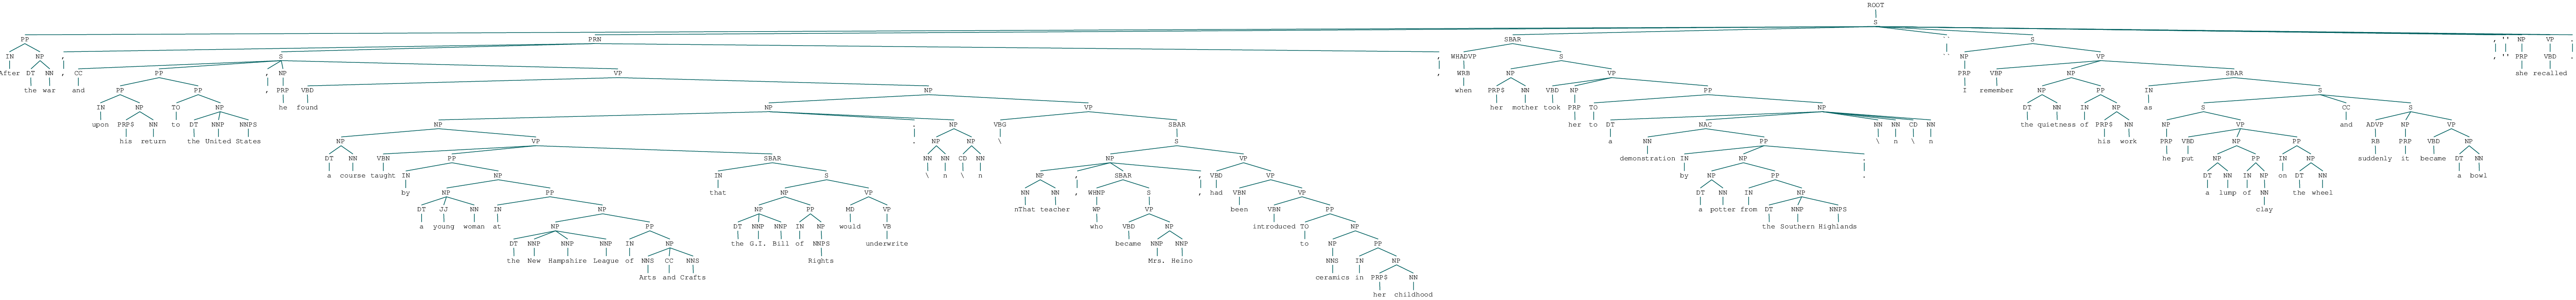

"Text = After the war, and upon his return to the United States, he found a course taught by a young woman at the New Hampshire League of Arts and Crafts that the G.I. Bill of Rights would underwrite.\\n\\n\\nThat teacher, who became Mrs. Heino, had been introduced to ceramics in her childhood, when her mother took her to a demonstration by a potter from the Southern Highlands.\\n\\n''I remember the quietness of his work as he put a lump of clay on the wheel and suddenly it became a bowl,'' she recalled."

'Code = 141'

'AID = 22872510'

2

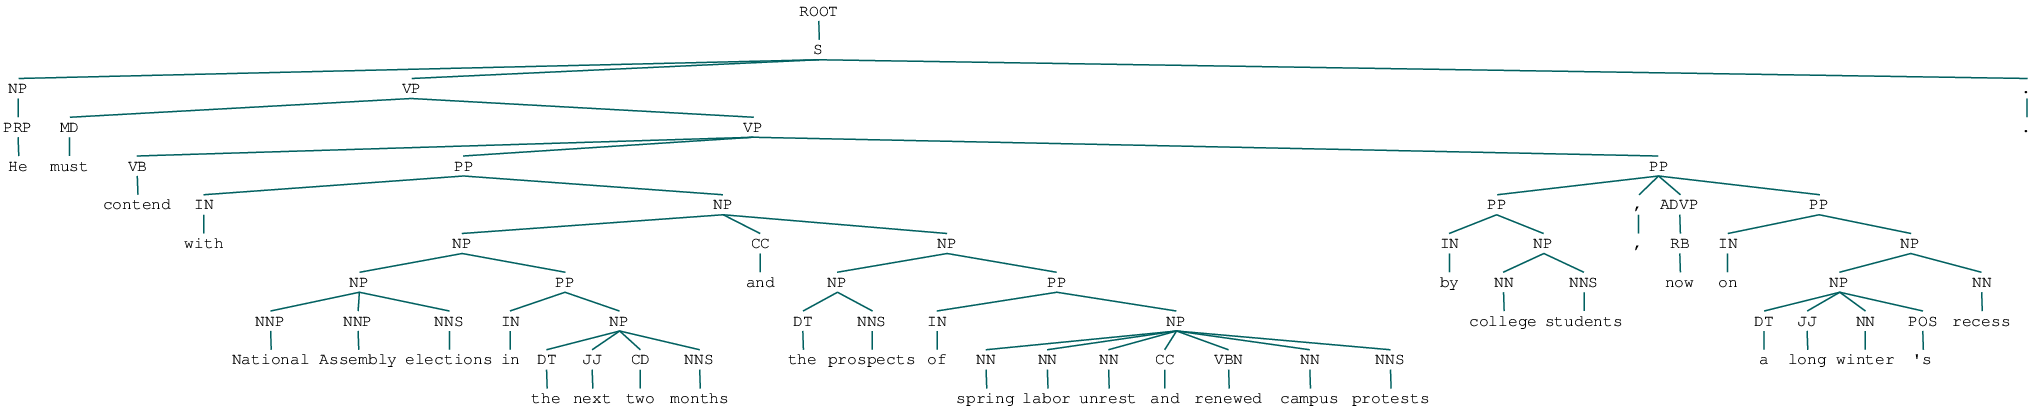

"Text = He must contend with National Assembly elections in the next two months and the prospects of spring labor unrest and renewed campus protests by college students, now on a long winter's recess."

'Code = 141'

'AID = 22901155'

3

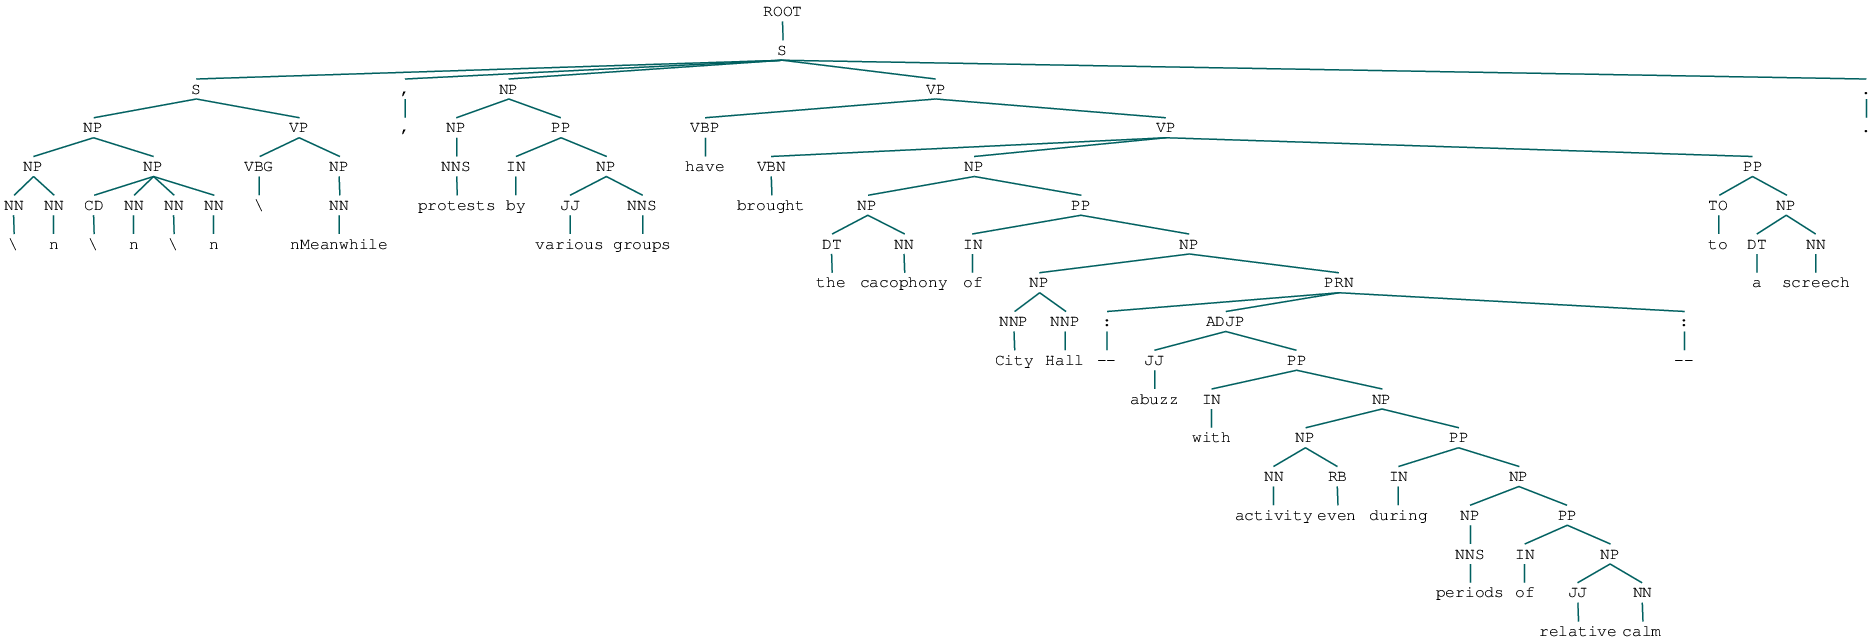

'Text = \\n\\n\\n\\nMeanwhile, protests by various groups have brought the cacophony of City Hall -- abuzz with activity even during periods of relative calm -- to a screech.'

'Code = 141'

'AID = 23152238'

4

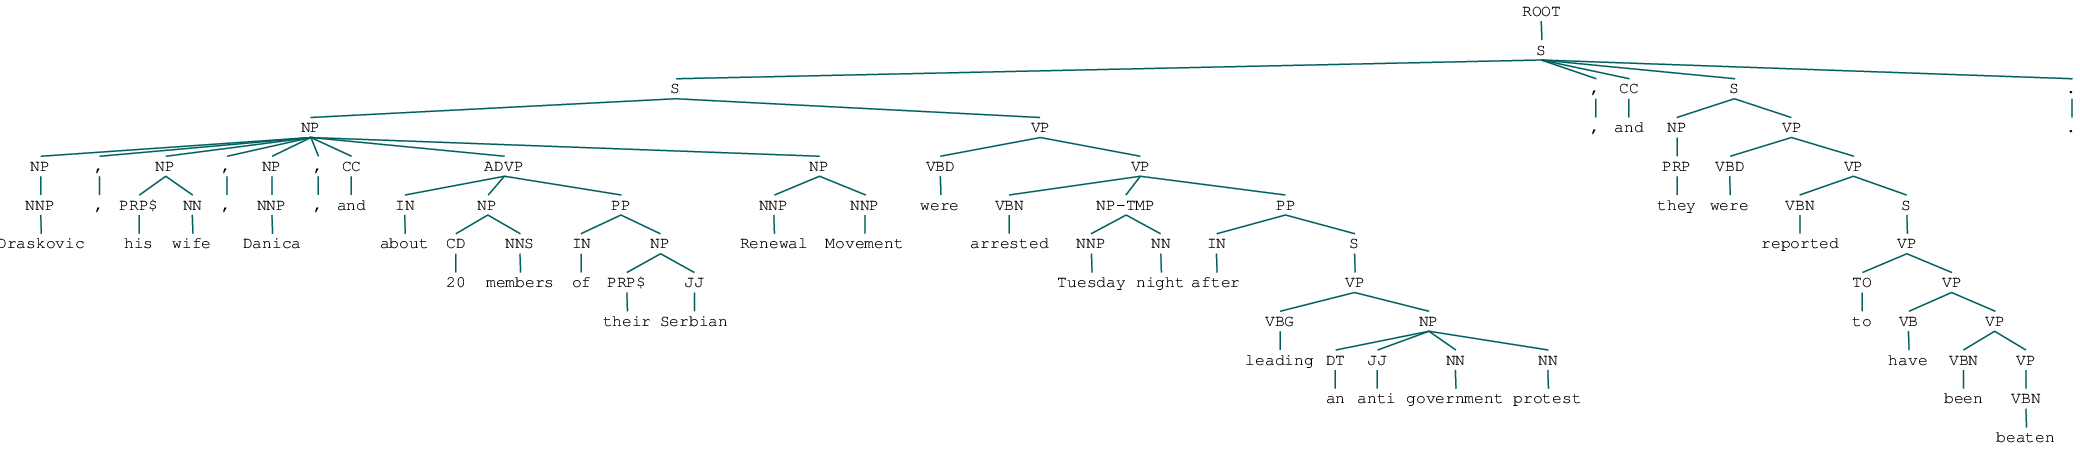

'Text = Draskovic, his wife, Danica, and about 20 members of their Serbian Renewal Movement were arrested Tuesday night after leading an anti government protest, and they were reported to have been beaten.'

'Code = 141'

'AID = 23269344'

5

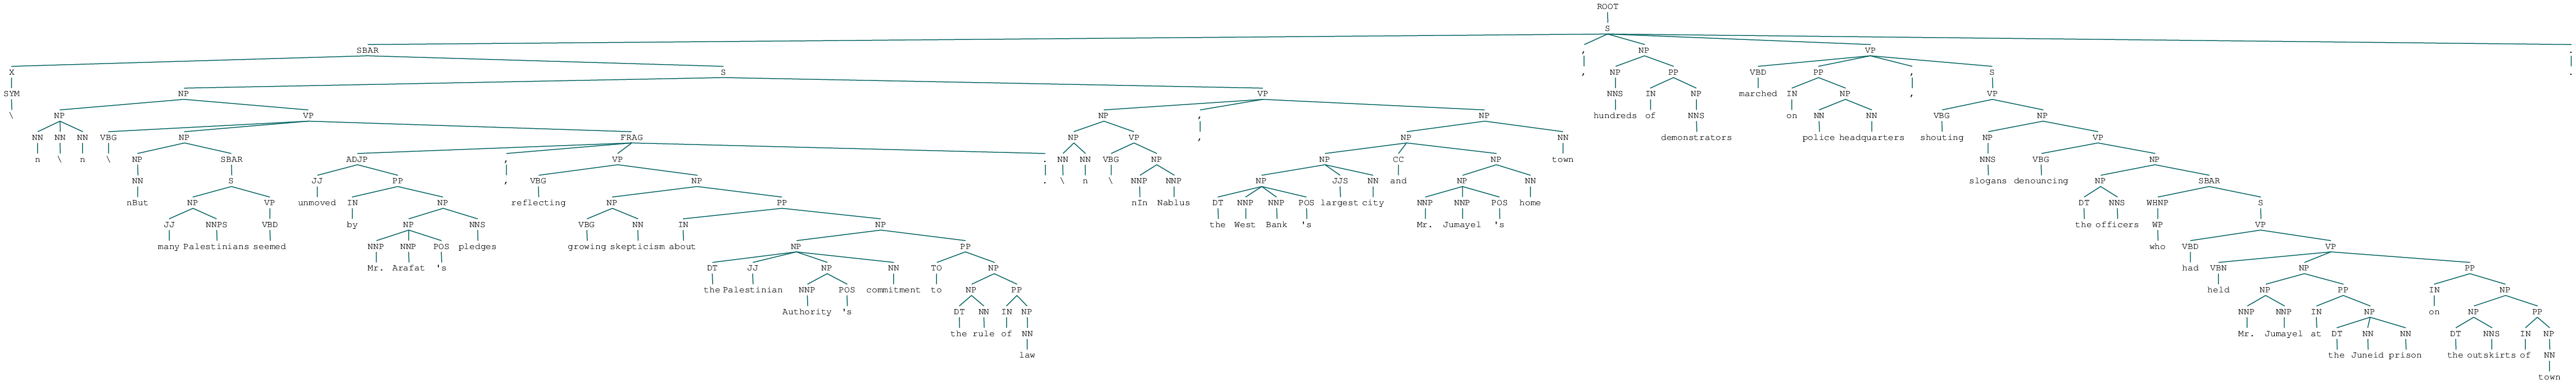

"Text = \\n\\n\\nBut many Palestinians seemed unmoved by Mr. Arafat's pledges, reflecting growing skepticism about the Palestinian Authority's commitment to the rule of law.\\n\\nIn Nablus, the West Bank's largest city and Mr. Jumayel's home town, hundreds of demonstrators marched on police headquarters, shouting slogans denouncing the officers who had held Mr. Jumayel at the Juneid prison on the outskirts of town."

'Code = 141'

'AID = 23505196'

6

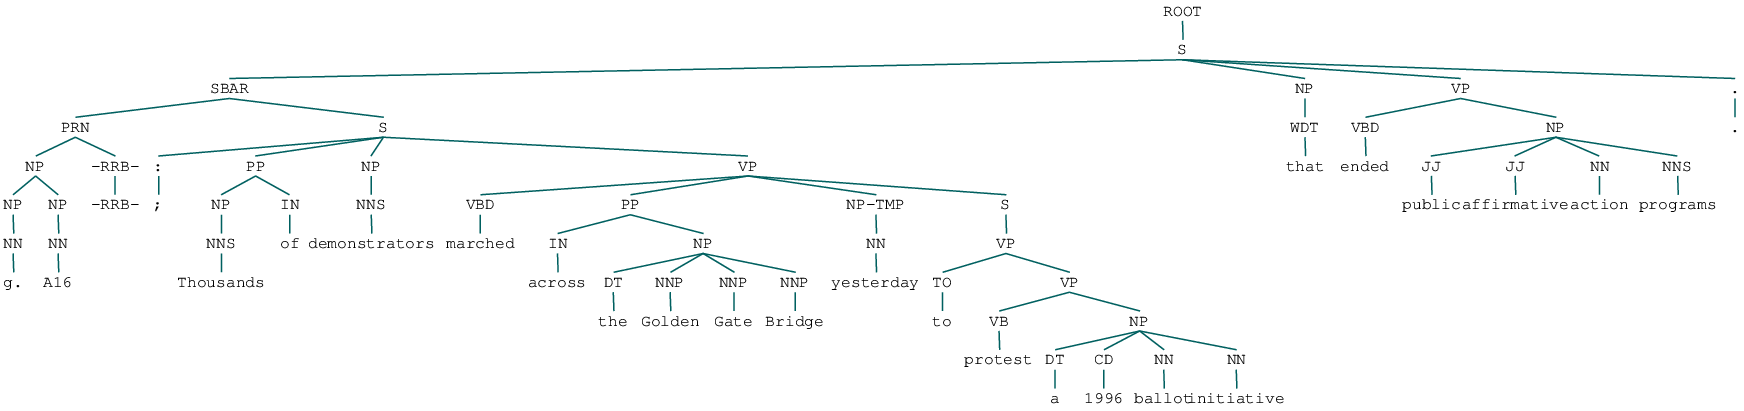

'Text = g. A16); Thousands of demonstrators marched across the Golden Gate Bridge yesterday to protest a 1996 ballot initiative that ended public affirmative action programs.'

'Code = 141'

'AID = 23567702'

7

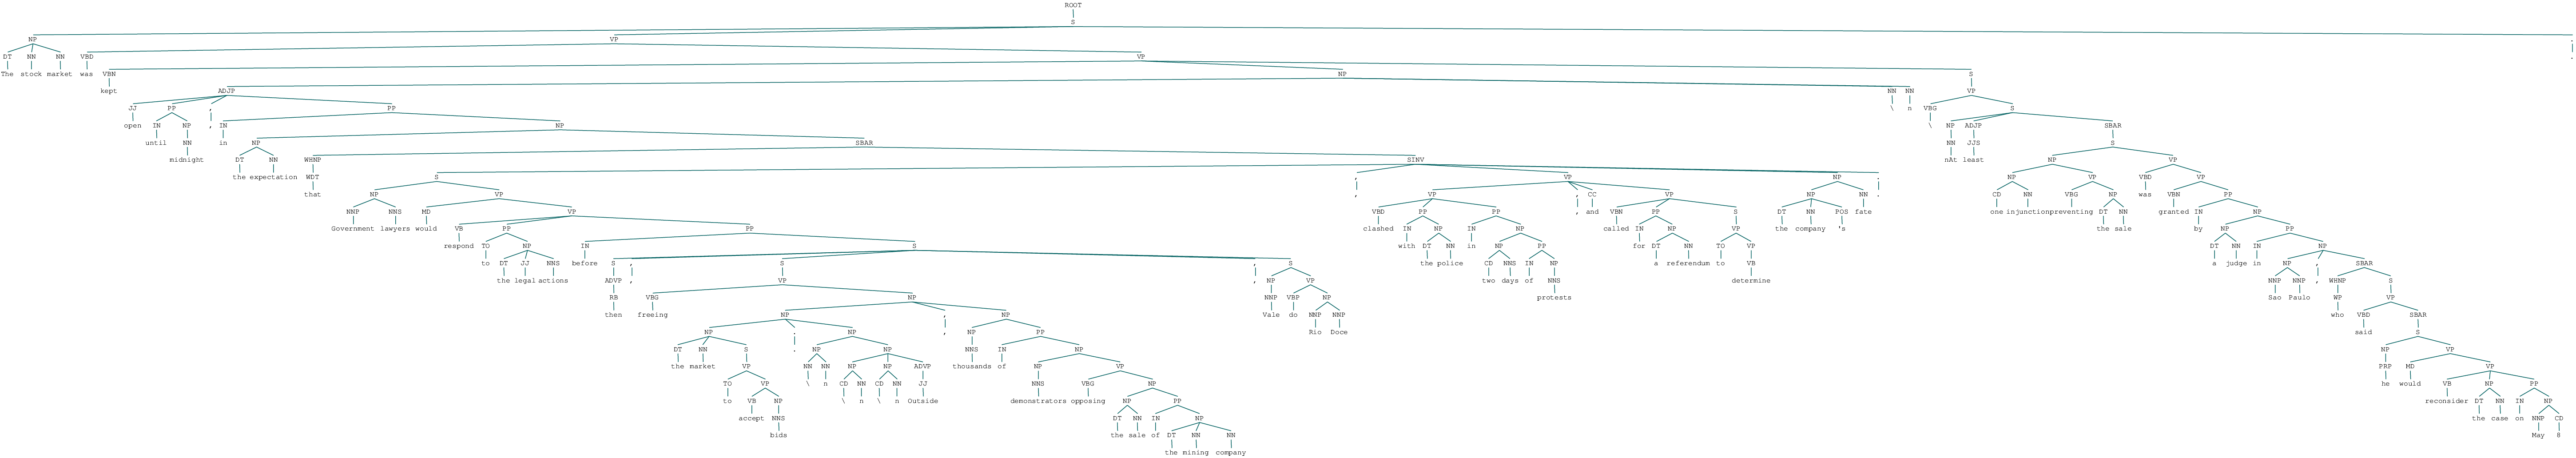

"Text = The stock market was kept open until midnight, in the expectation that Government lawyers would respond to the legal actions before then, freeing the market to accept bids.\\n\\n\\n Outside, thousands of demonstrators opposing the sale of the mining company, Vale do Rio Doce, clashed with the police in two days of protests, and called for a referendum to determine the company's fate.\\n\\nAt least one injunction preventing the sale was granted by a judge in Sao Paulo, who said he would reconsider the case on May 8."

'Code = 141'

'AID = 23584707'

8

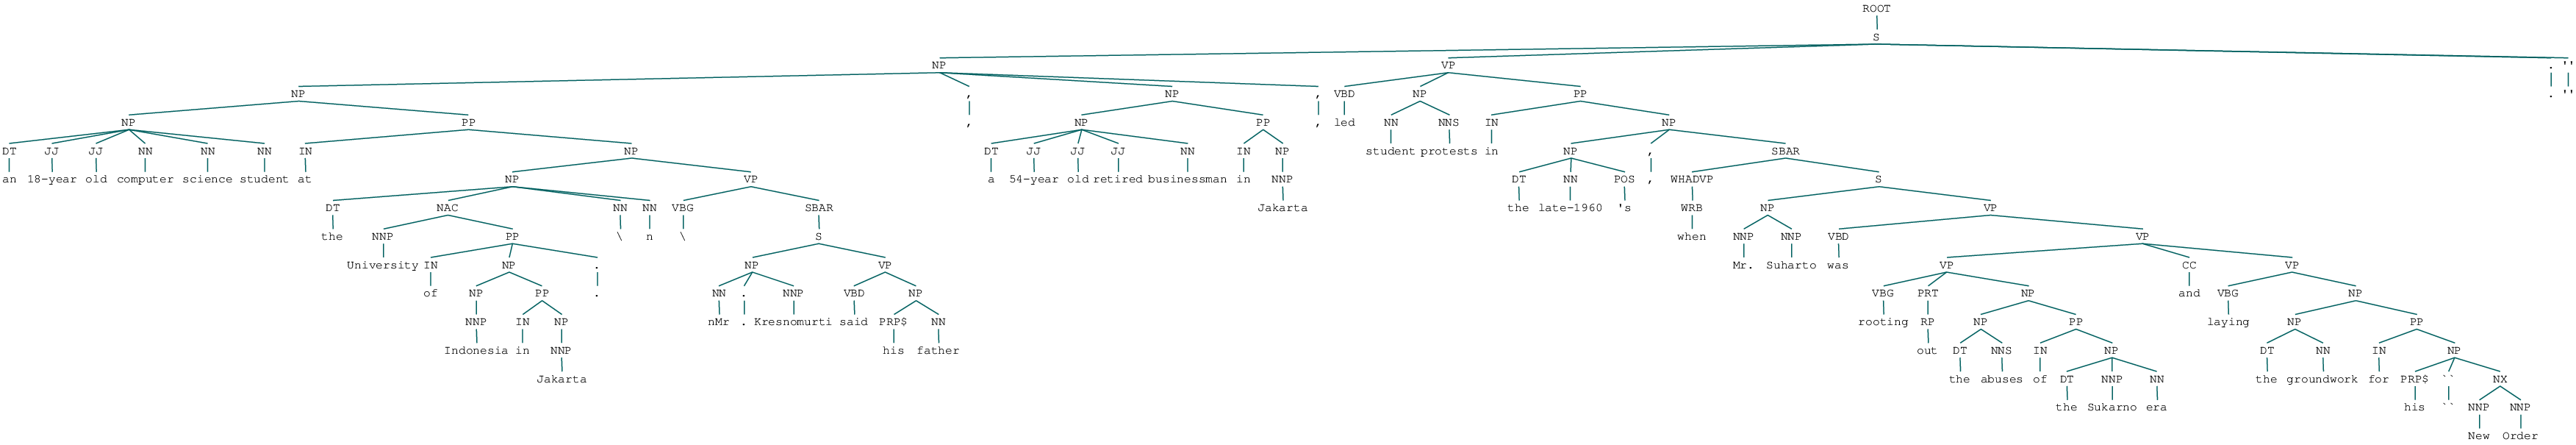

"Text =  an 18-year old computer science student at the University of Indonesia in Jakarta.\\n\\nMr. Kresnomurti said his father, a 54-year old retired businessman in Jakarta, led student protests in the late-1960's, when Mr. Suharto was rooting out the abuses of the Sukarno era and laying the groundwork for his ''New Order.''"

'Code = 141'

'AID = 23619781'

9

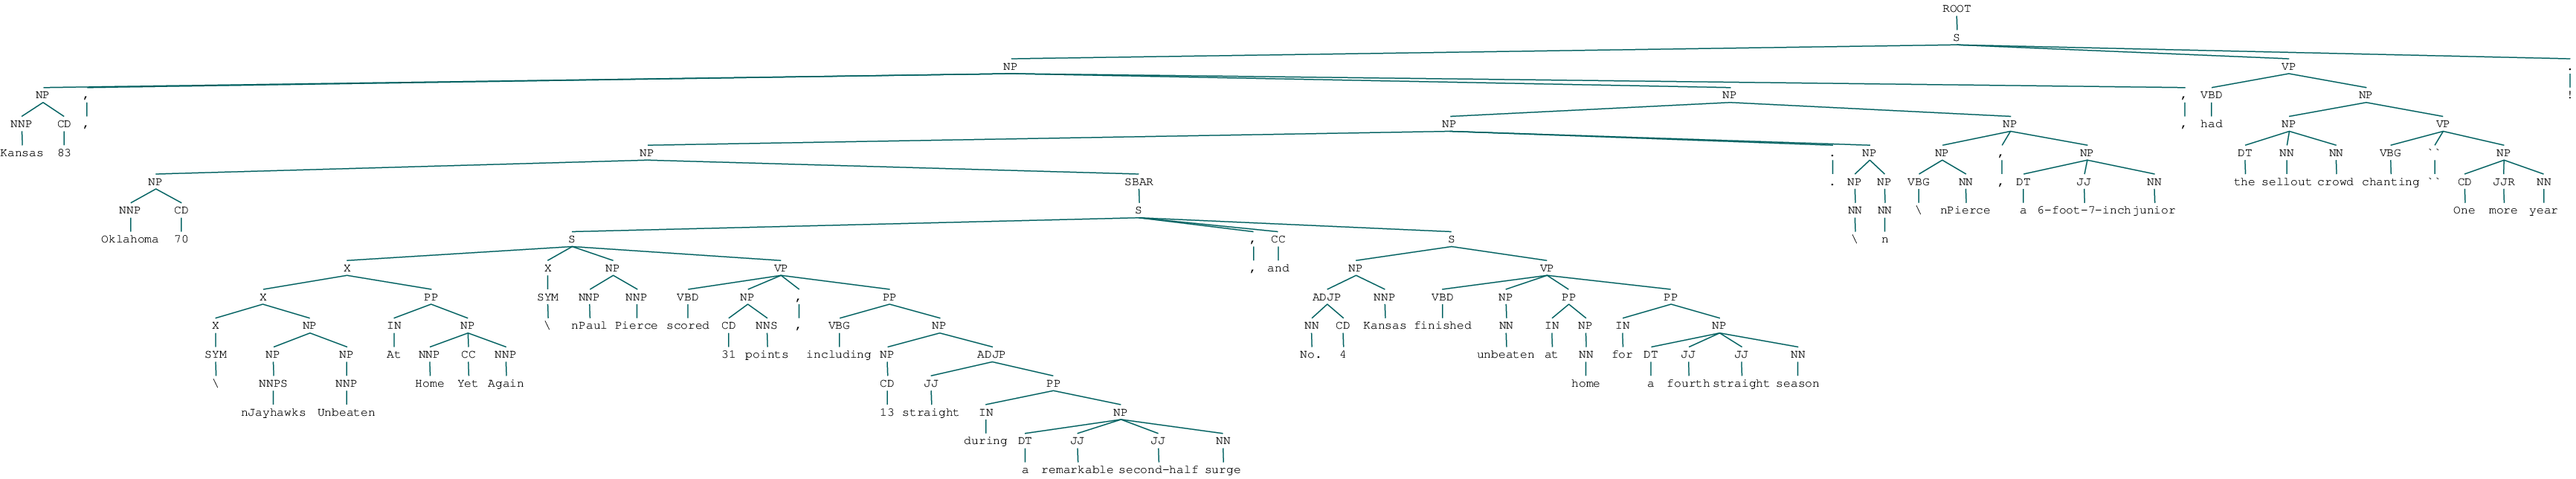

"Text = Kansas 83, Oklahoma 70\\nJayhawks Unbeaten At Home Yet Again\\nPaul Pierce scored 31 points, including 13 straight during a remarkable second-half surge, and No. 4 Kansas finished unbeaten at home for a fourth straight season.\\n\\nPierce, a 6-foot-7-inch junior, had the sellout crowd chanting ''One more year!"

'Code = 141'

'AID = 23630315'

10

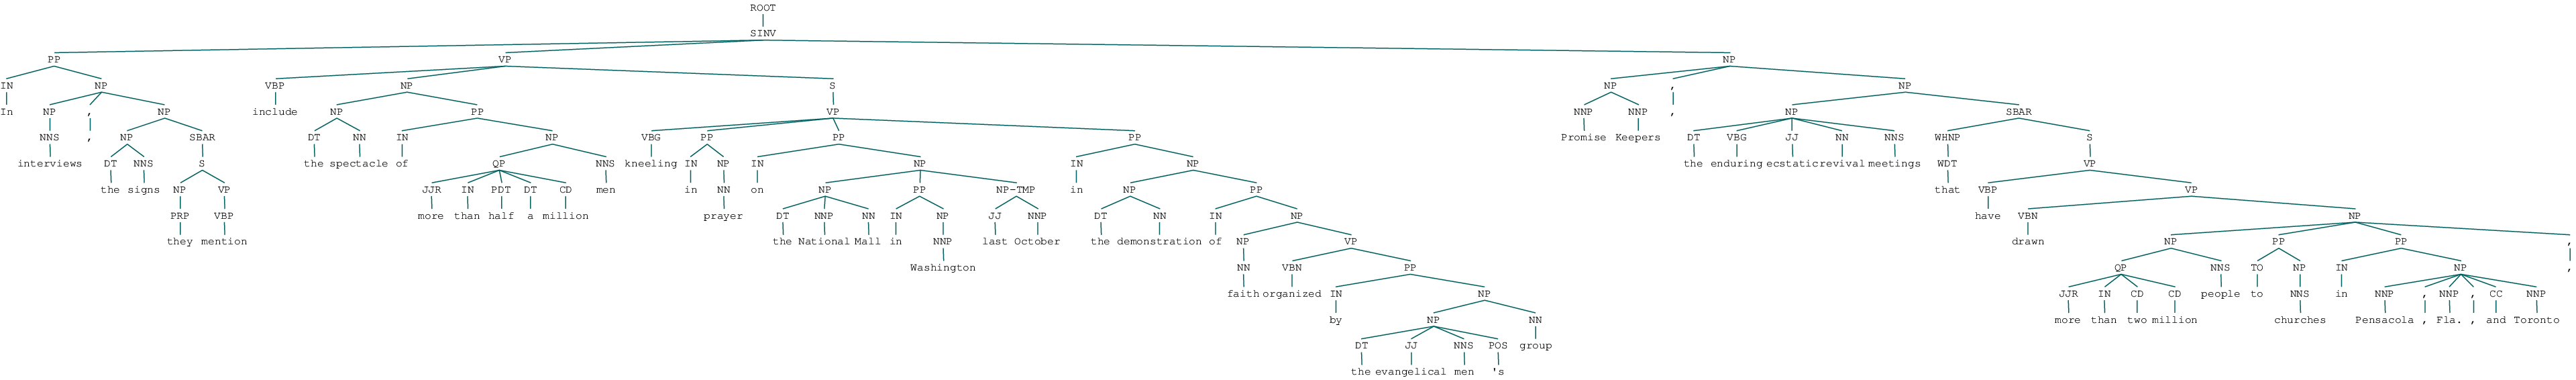

"Text = In interviews, the signs they mention include the spectacle of more than half a million men kneeling in prayer on the National Mall in Washington last October in the demonstration of faith organized by the evangelical men's group Promise Keepers, the enduring ecstatic revival meetings that have drawn more than two million people to churches in Pensacola, Fla., and Toronto,"

'Code = 141'

'AID = 23632464'

11

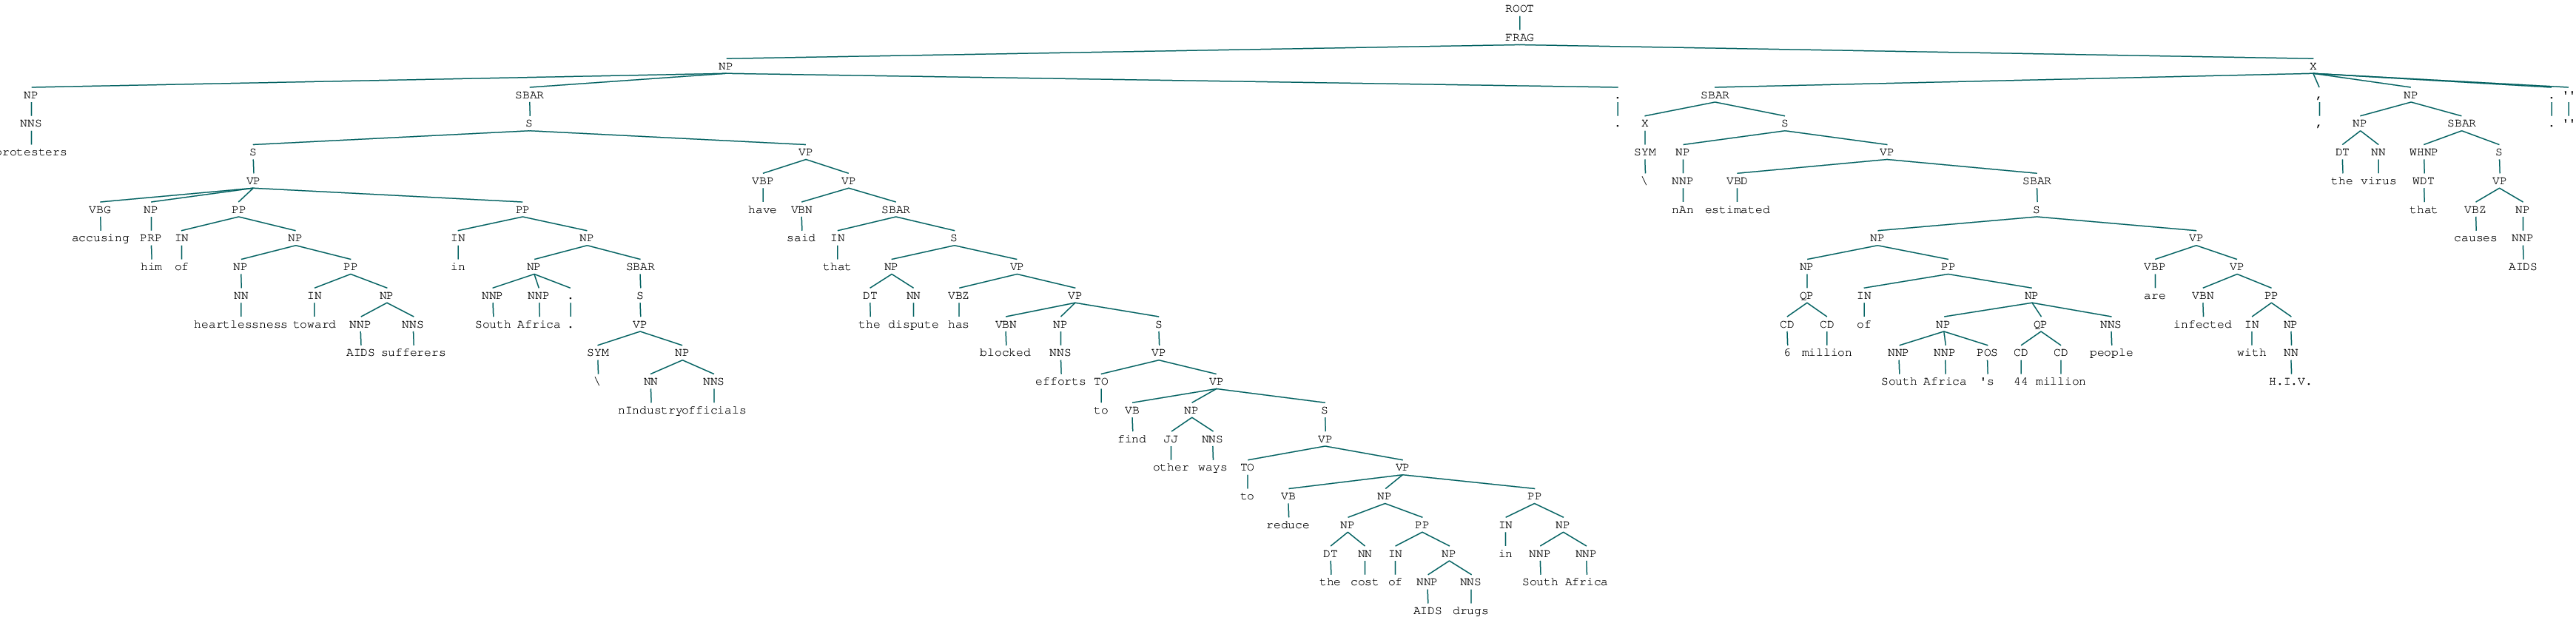

'Text = protesters accusing him of heartlessness toward AIDS sufferers in South Africa.\\nIndustry officials have said that the dispute has blocked efforts to find other ways to reduce the cost of AIDS drugs in South Africa.\\nAn estimated 6 million of South Africa\'s 44 million people are infected with H.I.V., the virus that causes AIDS."'

'Code = 141'

'AID = 23679604'

12

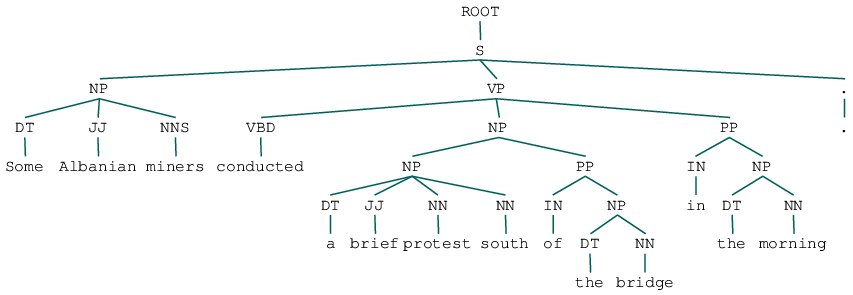

'Text = Some Albanian miners conducted a brief protest south of the bridge in the morning.'

'Code = 141'

'AID = 23721997'

13

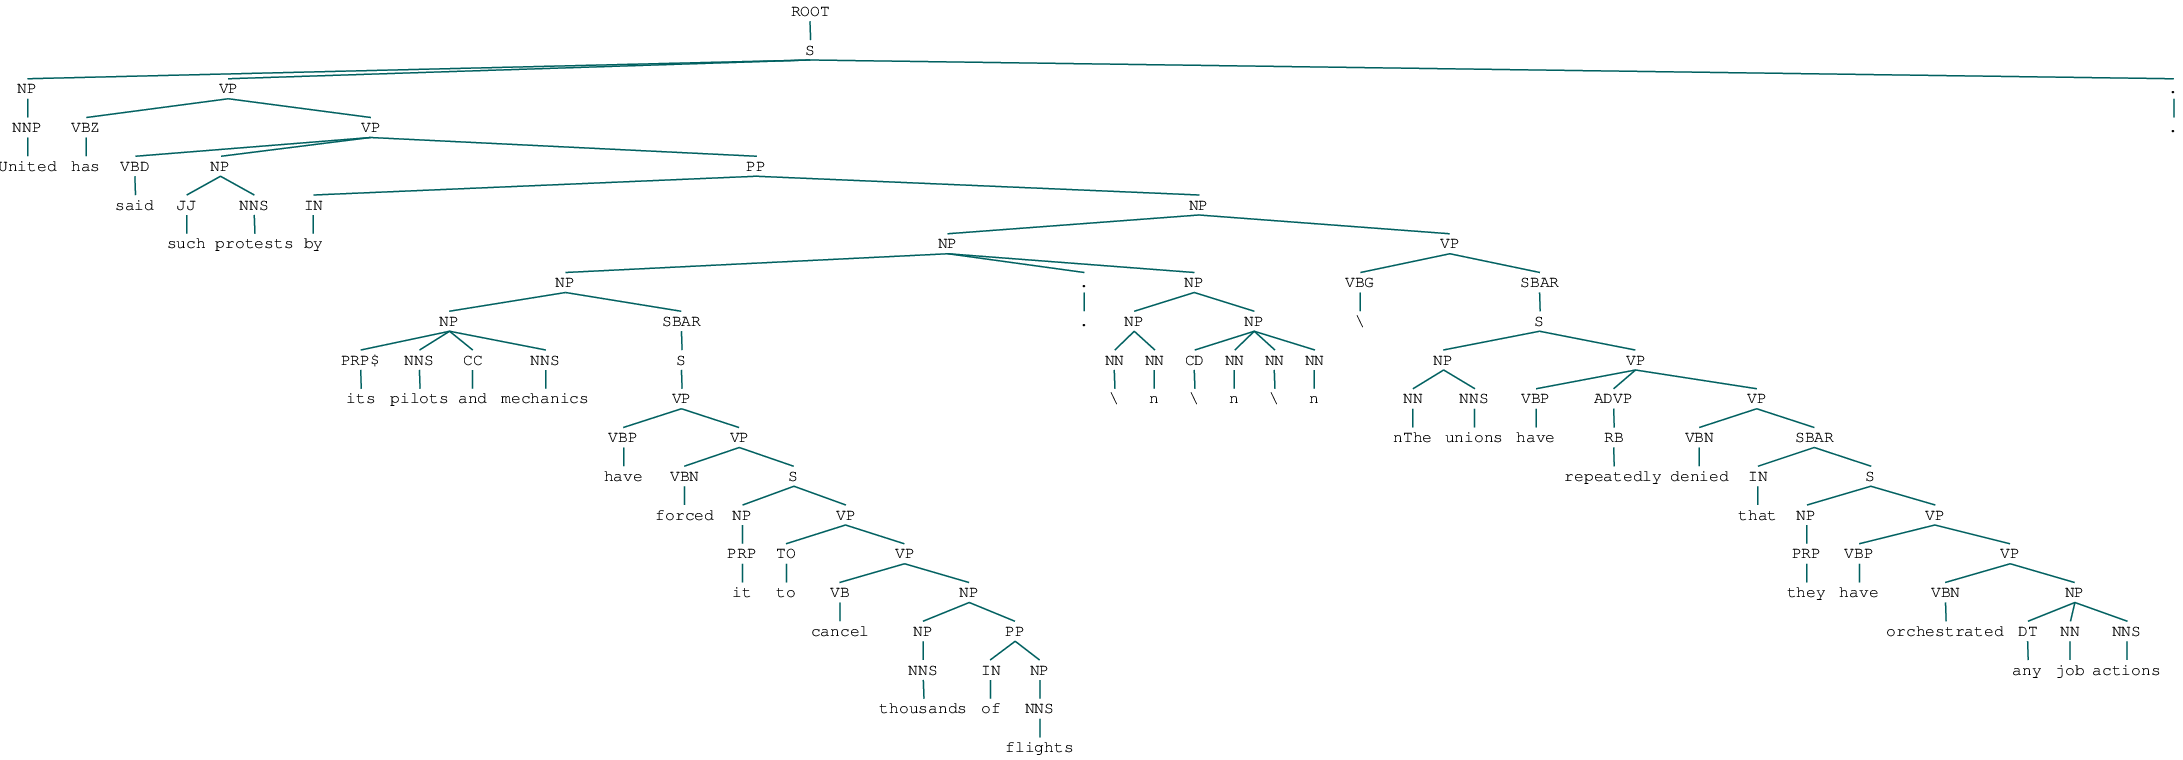

'Text = United has said such protests by its pilots and mechanics have forced it to cancel thousands of flights.\\n\\n\\n\\nThe unions have repeatedly denied that they have orchestrated any job actions.'

'Code = 141'

'AID = 23727965'

14

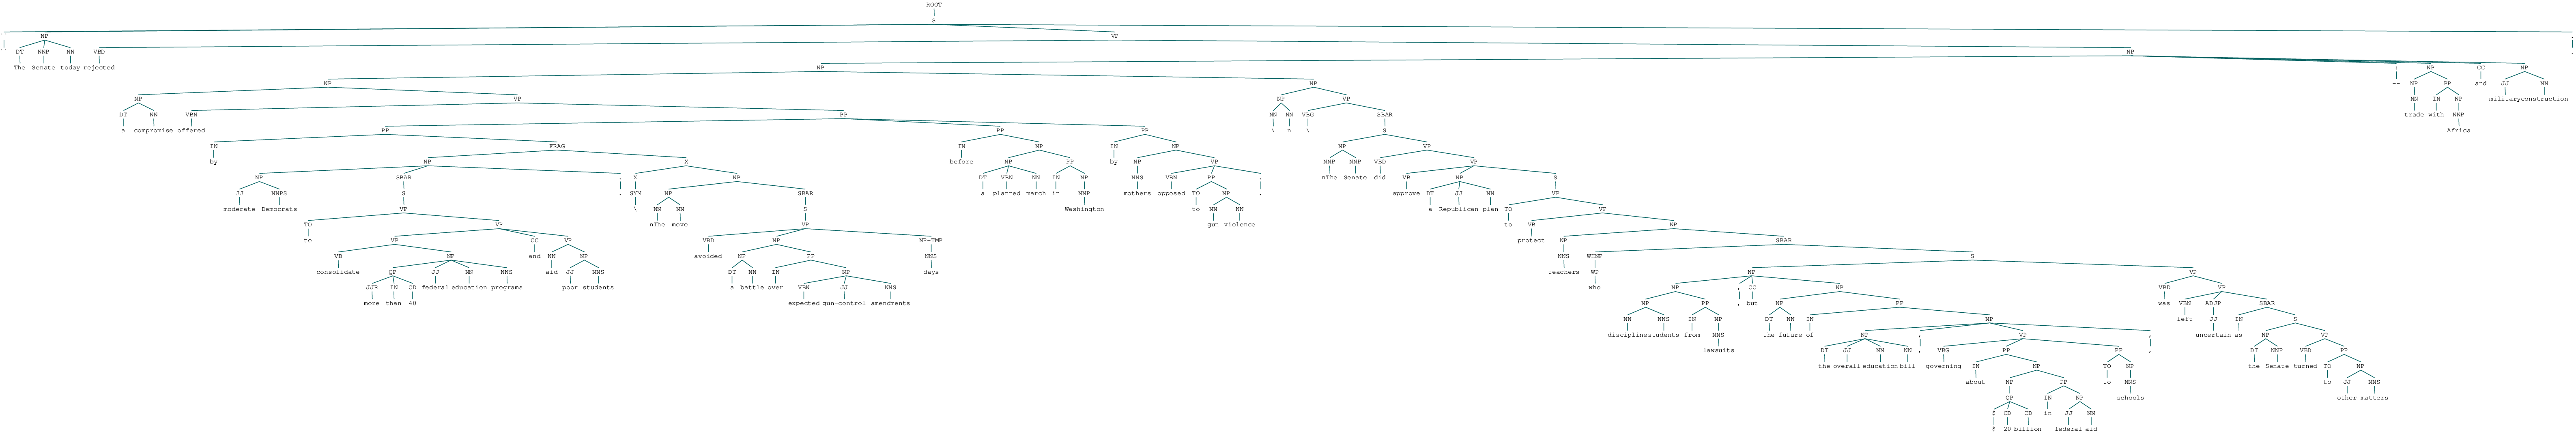

'Text = "The Senate today rejected a compromise offered by moderate Democrats to consolidate more than 40 federal education programs and aid poor students.\\nThe move avoided a battle over expected gun-control amendments days before a planned march in Washington by mothers opposed to gun violence.\\n\\nThe Senate did approve a Republican plan to protect teachers who discipline students from lawsuits, but the future of the overall education bill, governing about $20 billion in federal aid to schools, was left uncertain as the Senate turned to other matters -- trade with Africa and military construction.'

'Code = 141'

'AID = 23740604'

15

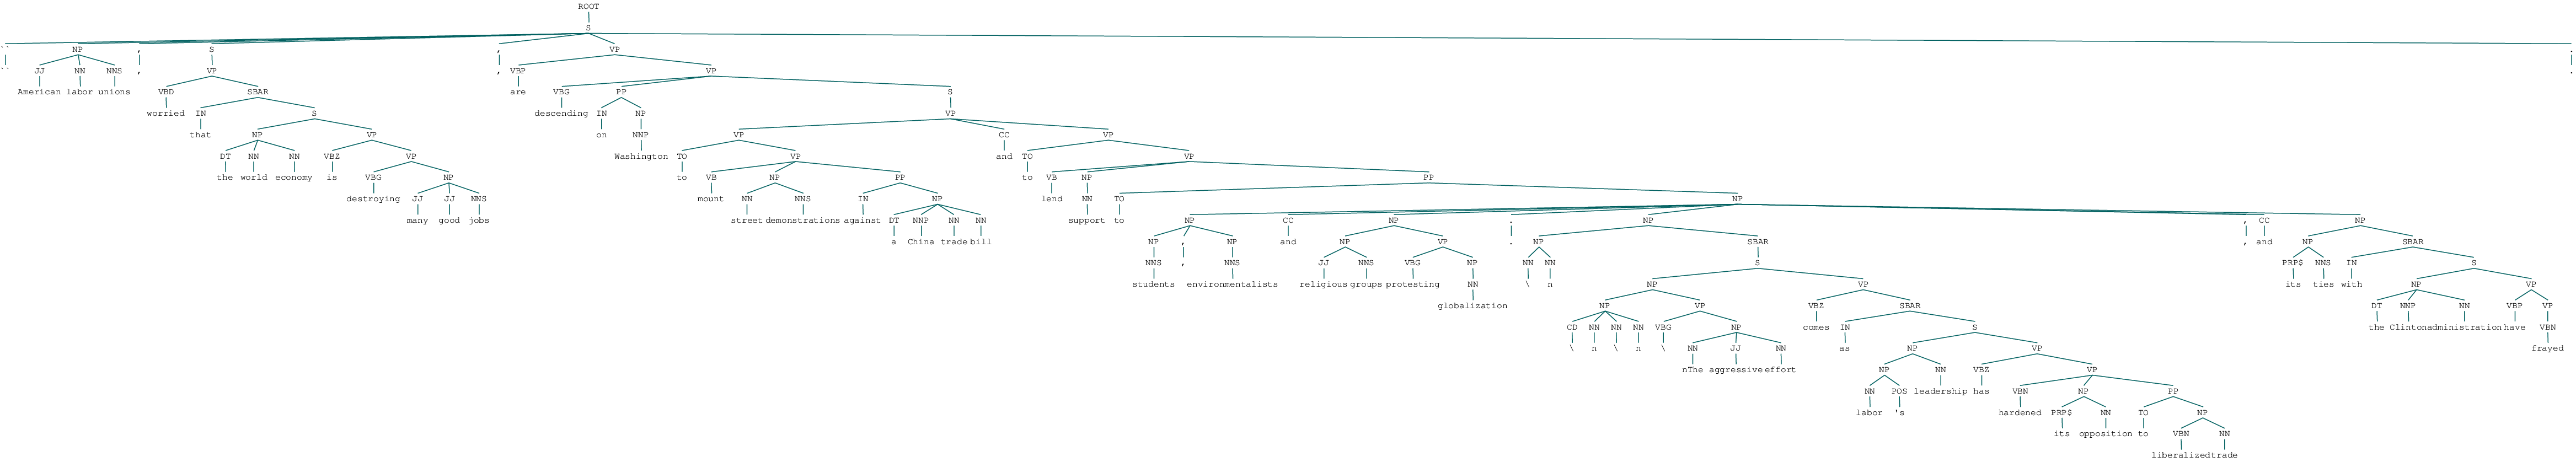

'Text = "American labor unions, worried that the world economy is destroying many good jobs, are descending on Washington to mount street demonstrations against a China trade bill and to lend support to students, environmentalists and religious groups protesting globalization.\\n\\n\\n\\nThe aggressive effort comes as labor\'s leadership has hardened its opposition to liberalized trade, and its ties with the Clinton administration have frayed.'

'Code = 141'

'AID = 23744312'

16

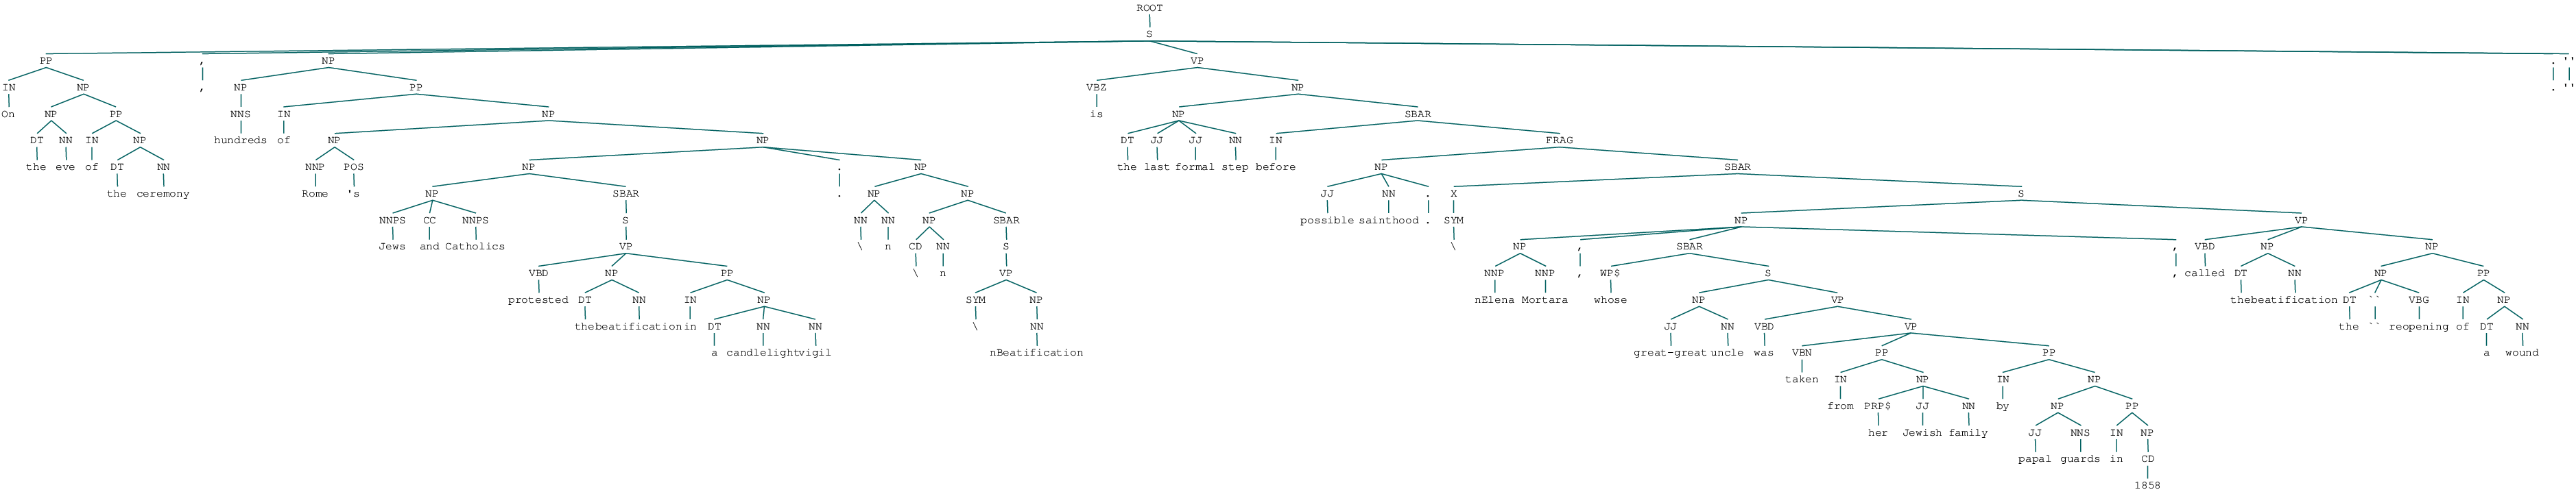

"Text = On the eve of the ceremony, hundreds of Rome's Jews and Catholics protested the beatification in a candlelight vigil.\\n\\n\\nBeatification is the last formal step before possible sainthood.\\nElena Mortara, whose great-great uncle was taken from her Jewish family by papal guards in 1858, called the beatification the ''reopening of a wound.''"

'Code = 141'

'AID = 23750101'

17

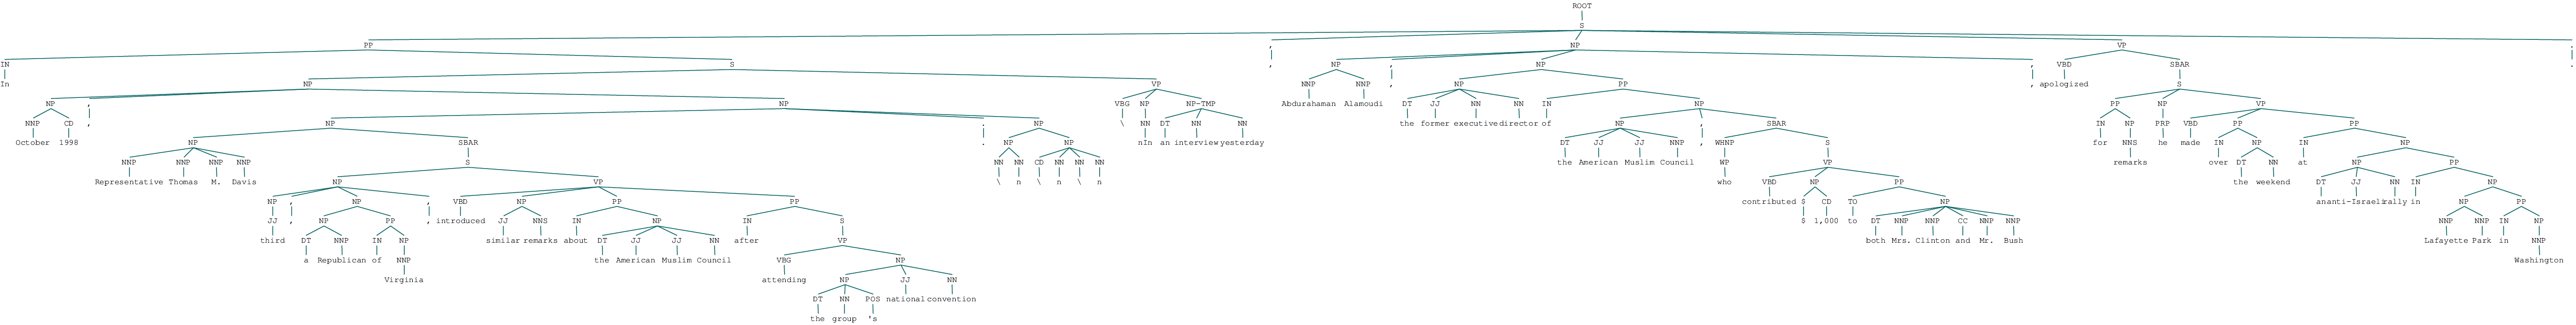

"Text = In October 1998, Representative Thomas M. Davis third, a Republican of Virginia, introduced similar remarks about the American Muslim Council after attending the group's national convention.\\n\\n\\n\\nIn an interview yesterday, Abdurahaman Alamoudi, the former executive director of the American Muslim Council, who contributed $1,000 to both Mrs. Clinton and Mr. Bush, apologized for remarks he made over the weekend at an anti-Israeli rally in Lafayette Park in Washington."

'Code = 141'

'AID = 23751512'

18

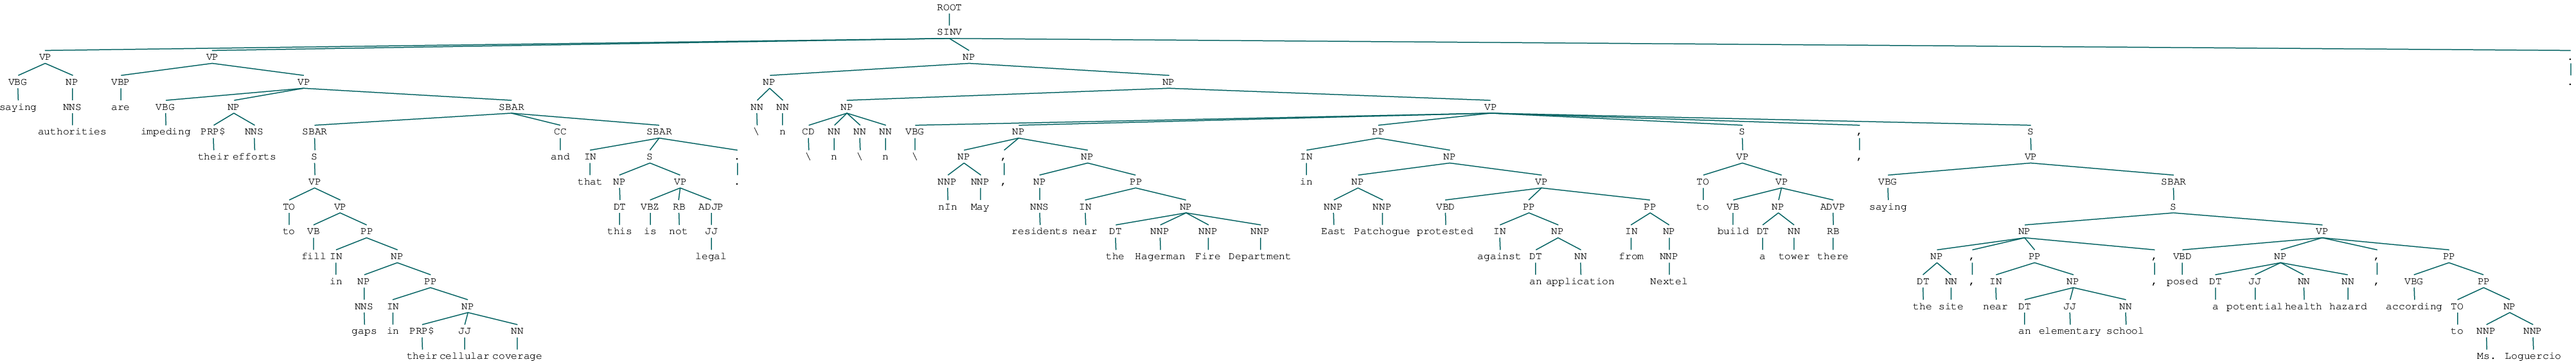

'Text =  saying authorities are impeding their efforts to fill in gaps in their cellular coverage and that this is not legal.\\n\\n\\n\\nIn May, residents near the Hagerman Fire Department in East Patchogue protested against an application from Nextel to build a tower there, saying the site, near an elementary school, posed a potential health hazard, according to Ms. Loguercio.'

'Code = 141'

'AID = 23766809'

19

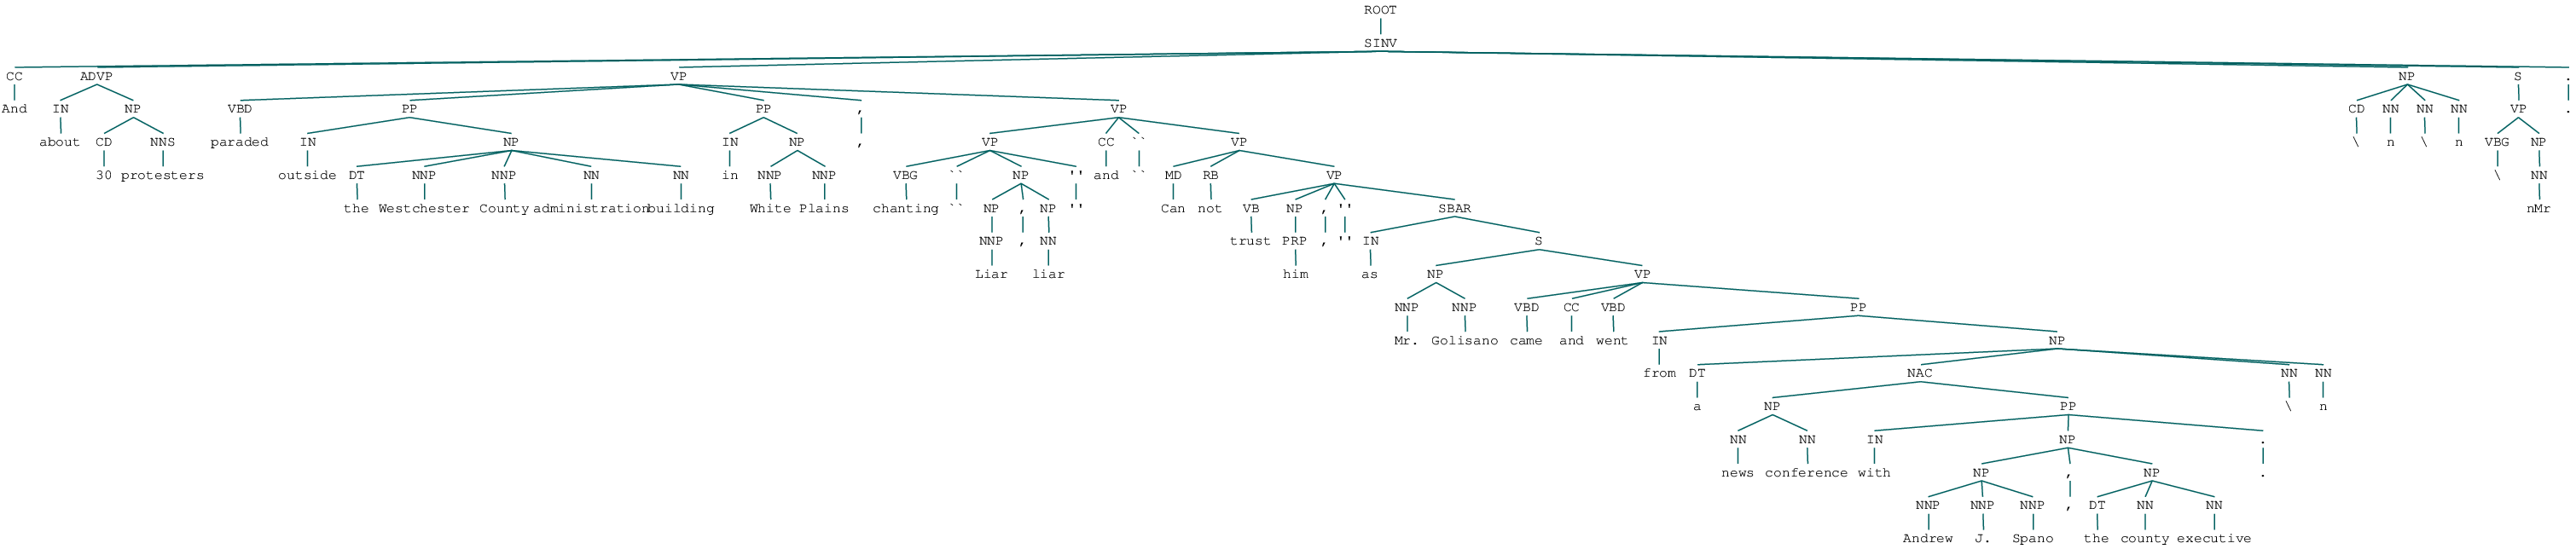

"Text = And about 30 protesters paraded outside the Westchester County administration building in White Plains, chanting ''Liar, liar'' and ''Can not trust him,'' as Mr. Golisano came and went from a news conference with Andrew J. Spano, the county executive.\\n\\n\\n\\nMr."

'Code = 141'

'AID = 23871062'

20

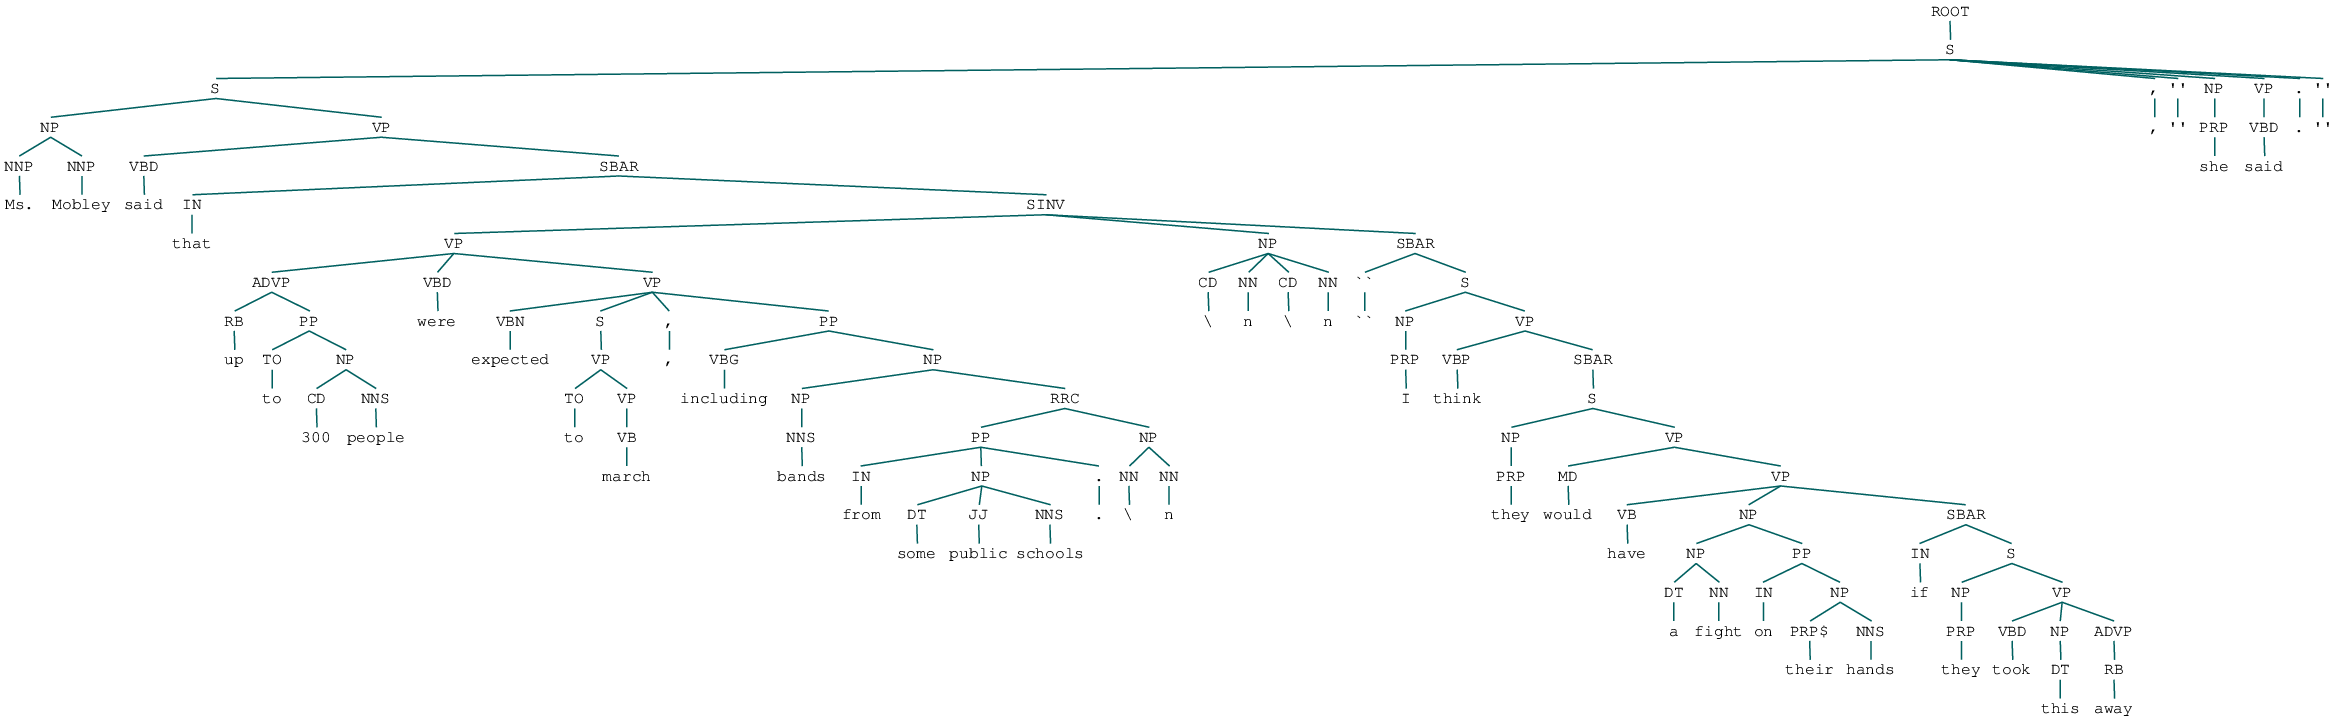

'Text = Ms. Mobley said that up to 300 people were expected to march, including bands from some public schools.\\n\\n\\n\'\'I think they would have a fight on their hands if they took this away,\'\' she said."'

'Code = 141'

'AID = 23908233'

21

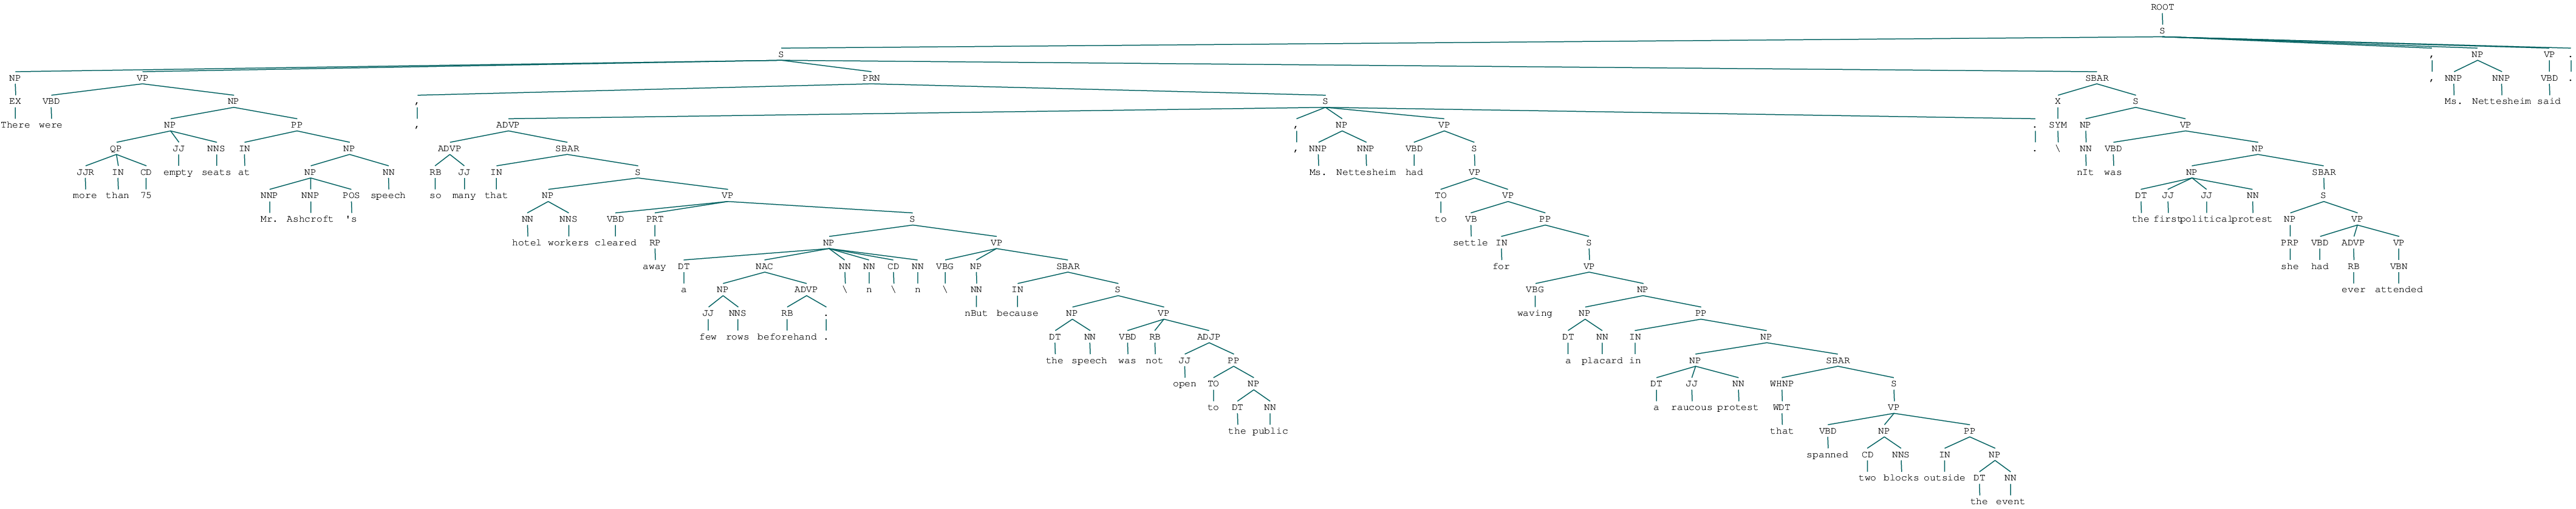

"Text = There were more than 75 empty seats at Mr. Ashcroft's speech, so many that hotel workers cleared away a few rows beforehand.\\n\\n\\nBut because the speech was not open to the public, Ms. Nettesheim had to settle for waving a placard in a raucous protest that spanned two blocks outside the event.\\nIt was the first political protest she had ever attended, Ms. Nettesheim said."

'Code = 141'

'AID = 23934739'

22

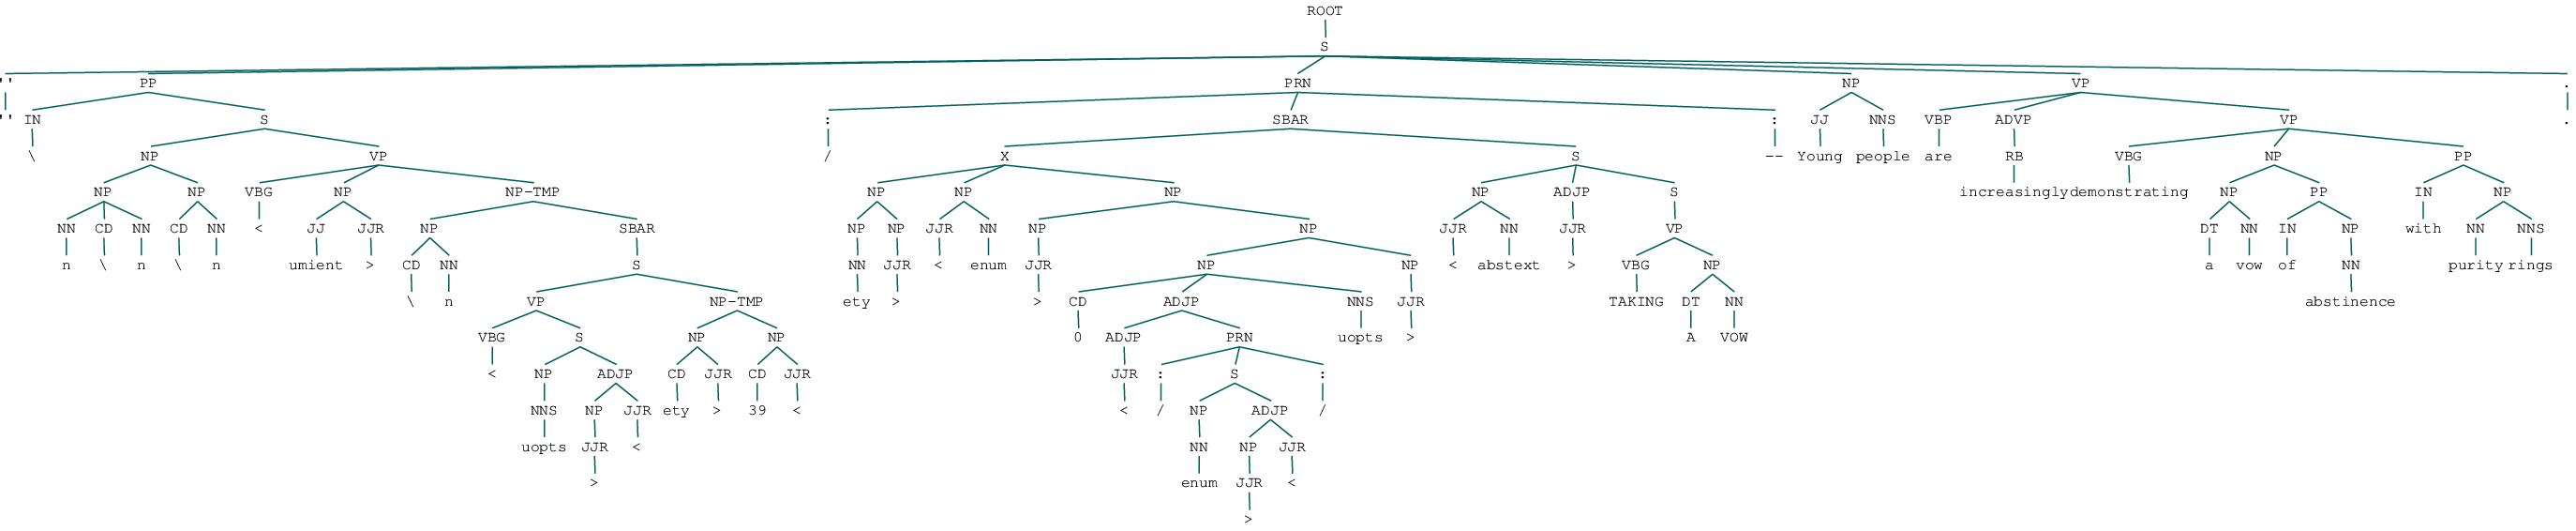

"Text = ''\\n\\n\\n&lt;umient&gt;\\n&lt;uopts&gt;&lt;ety&gt;39&lt;/ety&gt;&lt;enum&gt;0&lt;/enum&gt;&lt;/uopts&gt;&lt;abstext&gt; TAKING A VOW -- Young people are increasingly demonstrating a vow of abstinence with purity rings."

'Code = 141'

'AID = 24074558'

23

In [17]:
for i in range(len(accent3_only[accent3_only.code == '141'])):
    parsed_output(accent3_only[accent3_only.code == '141'], i)
    display(i)

## Look at ACCENT data to identify dictionary improvements

In [9]:
## Create subsets of data discarding identified errors in ACCENT coding

# event code 141
accent3_141 = accent3_only[accent3_only.code == '141'].reset_index(drop = True).drop([0, 2, 6, 8, 10, 11, 21, 23]).reset_index(drop = True)

# event code 143
accent3_143 = accent3_only[accent3_only.code == '143'].reset_index(drop = True).drop([9, 13, 19]).reset_index(drop = True)

# event code 145
accent3_145 = accent3_only[accent3_only.code == '145'].reset_index(drop = True).drop([8, 23]).reset_index(drop = True)

# event code 1723
accent3_1723 = accent3_only[accent3_only.code == '1723'].reset_index(drop = True).drop([8, 12, 15]).reset_index(drop = True)

# event code 181
accent3_181 = accent3_only[accent3_only.code == '181'].reset_index(drop = True).drop([12]).reset_index(drop = True)

# event code 1831
accent3_1831 = accent3_only[accent3_only.code == '1831'].reset_index(drop = True).drop([8]).reset_index(drop = True)

# event code 186
accent3_186 = accent3_only[accent3_only.code == '186'].reset_index(drop = True).drop([9, 12]).reset_index(drop = True)

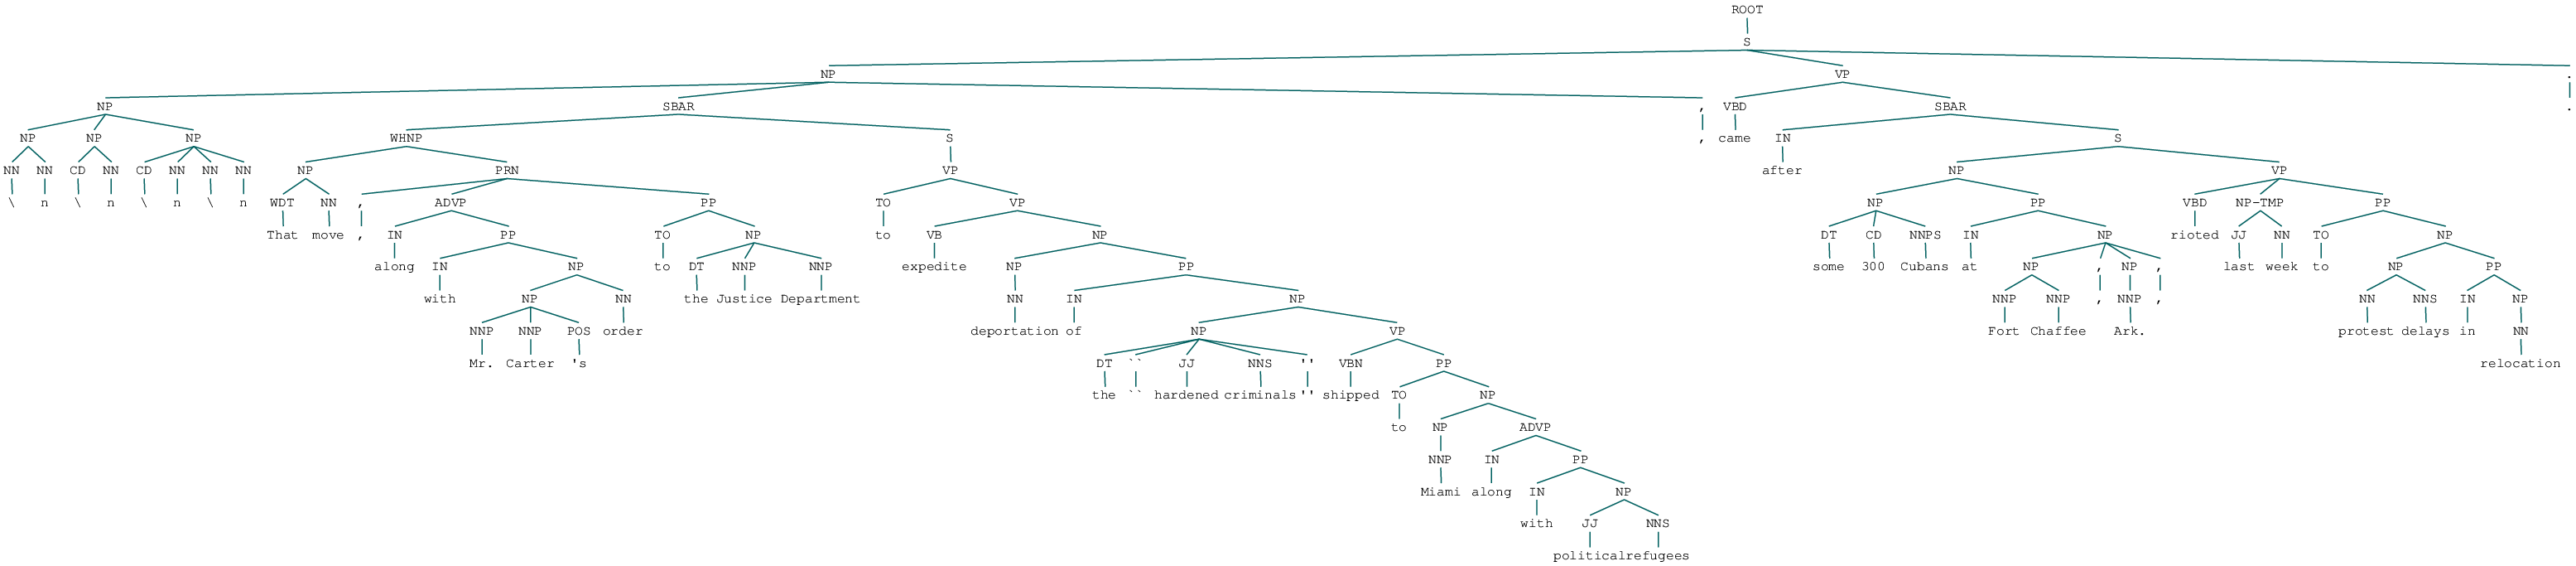

"Text = \\n\\n\\n\\n     That move, along with Mr. Carter's order to the Justice Department to expedite deportation of the ''hardened criminals'' shipped to Miami along with political refugees, came after some 300 Cubans at Fort Chaffee, Ark., rioted last week to protest delays in relocation."

'Code = 145'

'AID = 22343573'

0

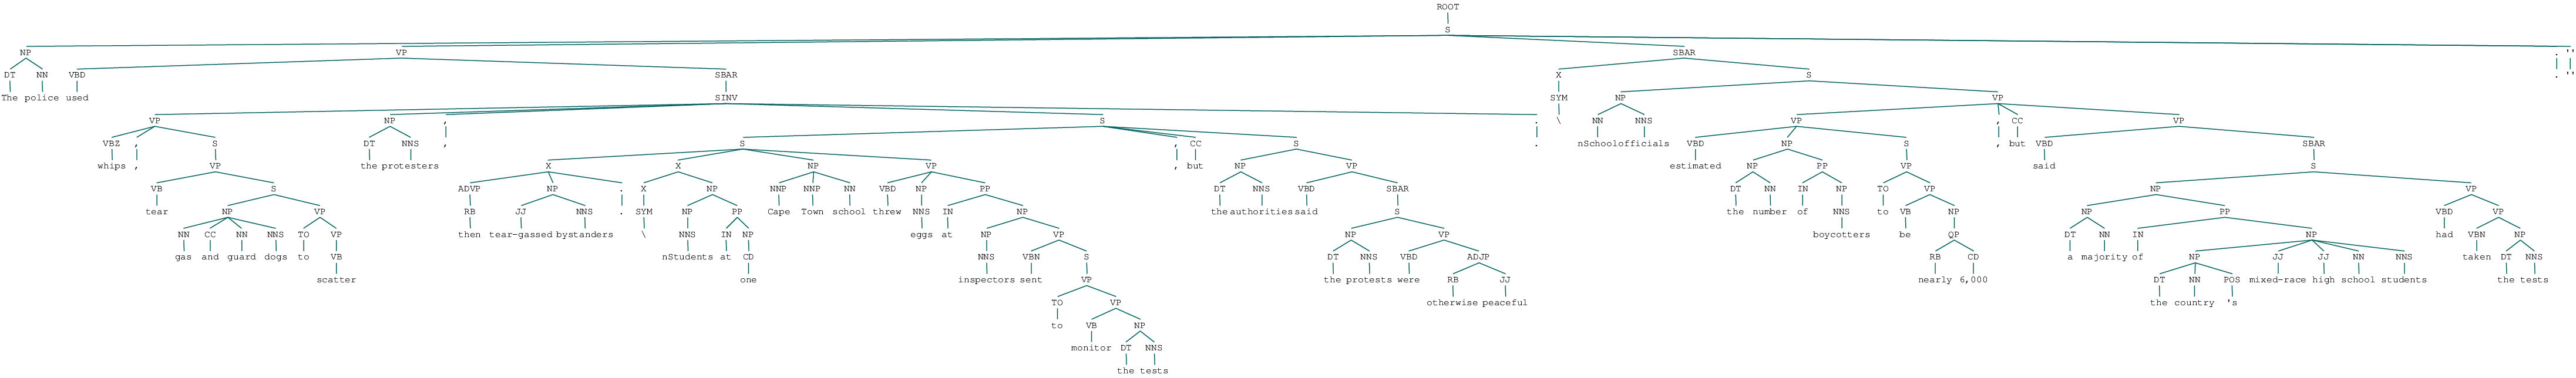

'Text = The police used whips, tear gas and guard dogs to scatter the protesters, then tear-gassed bystanders.\\nStudents at one Cape Town school threw eggs at inspectors sent to monitor the tests, but the authorities said the protests were otherwise peaceful.\\nSchool officials estimated the number of boycotters to be nearly 6,000, but said a majority of the country\'s mixed-race high school students had taken the tests."'

'Code = 145'

'AID = 22420969'

1

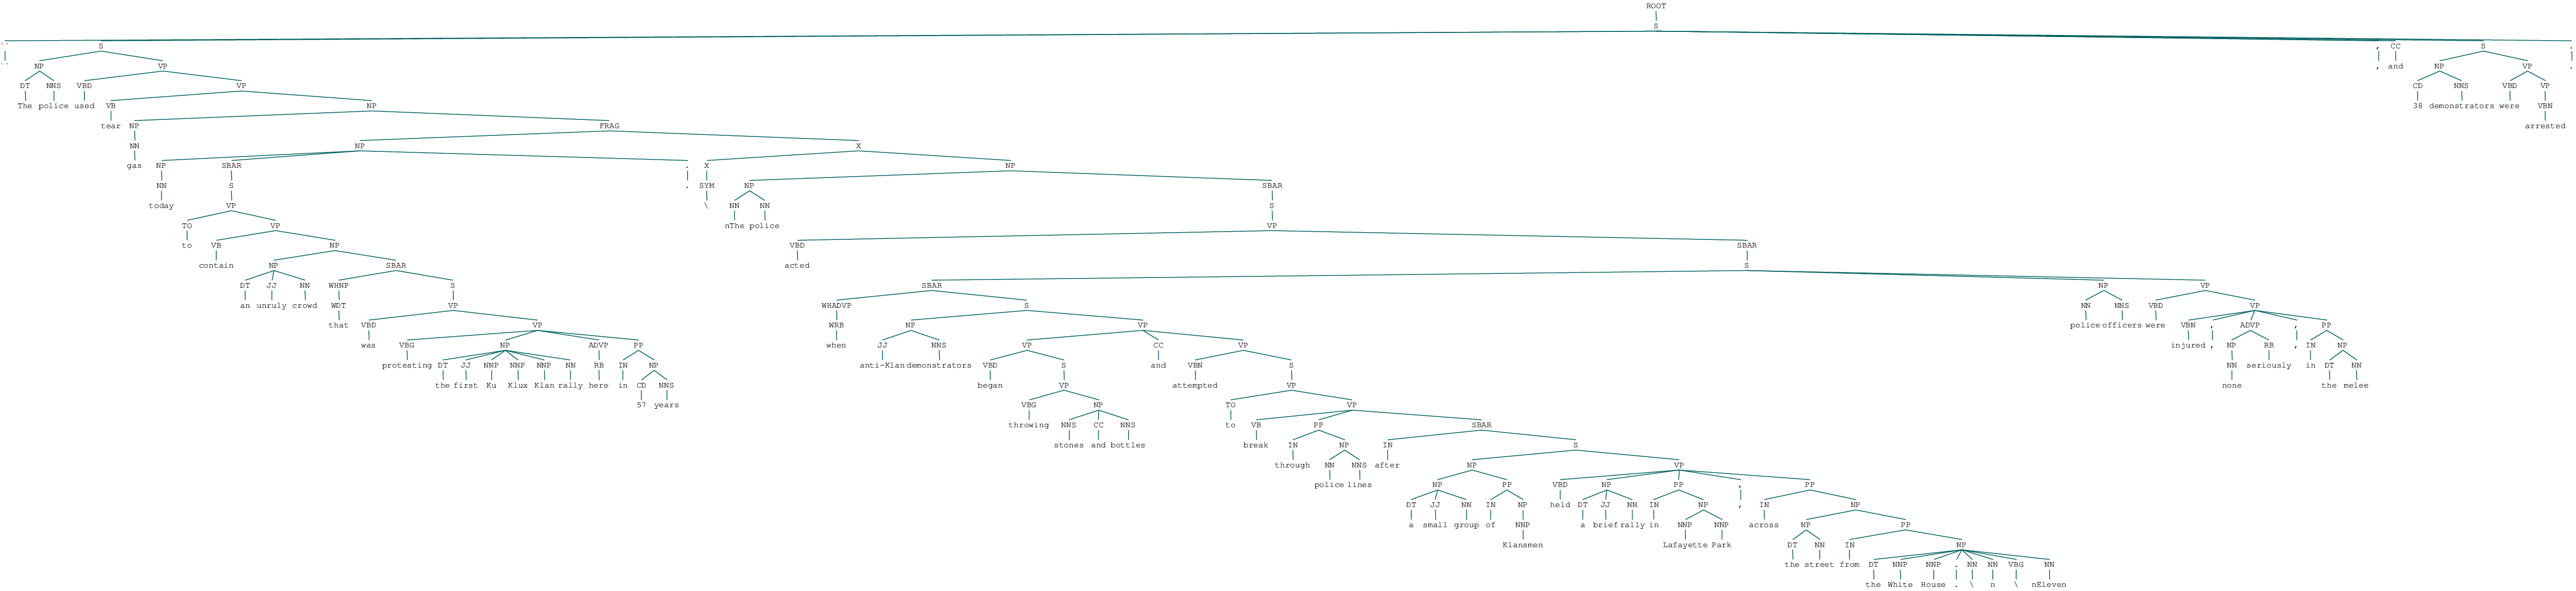

'Text = "The police used tear gas today to contain an unruly crowd that was protesting the first Ku Klux Klan rally here in 57 years.\\nThe police acted when anti-Klan demonstrators began throwing stones and bottles and attempted to break through police lines after a small group of Klansmen held a brief rally in Lafayette Park, across the street from the White House.\\n\\nEleven police officers were injured, none seriously, in the melee, and 38 demonstrators were arrested.'

'Code = 145'

'AID = 22474093'

2

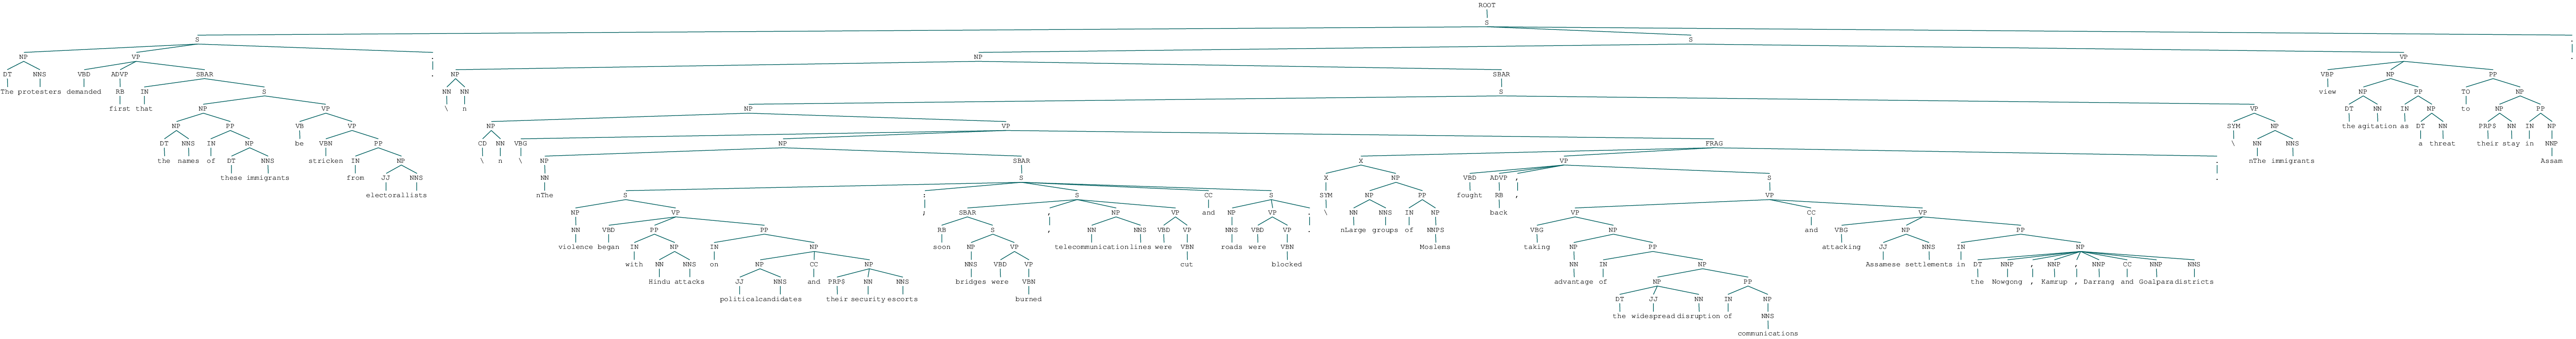

'Text = The protesters demanded first that the names of these immigrants be stricken from electoral lists.\\n\\n\\nThe violence began with Hindu attacks on political candidates and their security escorts; soon bridges were burned, telecommunication lines were cut and roads were blocked.\\nLarge groups of Moslems fought back, taking advantage of the widespread disruption of communications and attacking Assamese settlements in the Nowgong, Kamrup, Darrang and Goalpara districts.\\nThe immigrants view the agitation as a threat to their stay in Assam.'

'Code = 145'

'AID = 22524105'

3

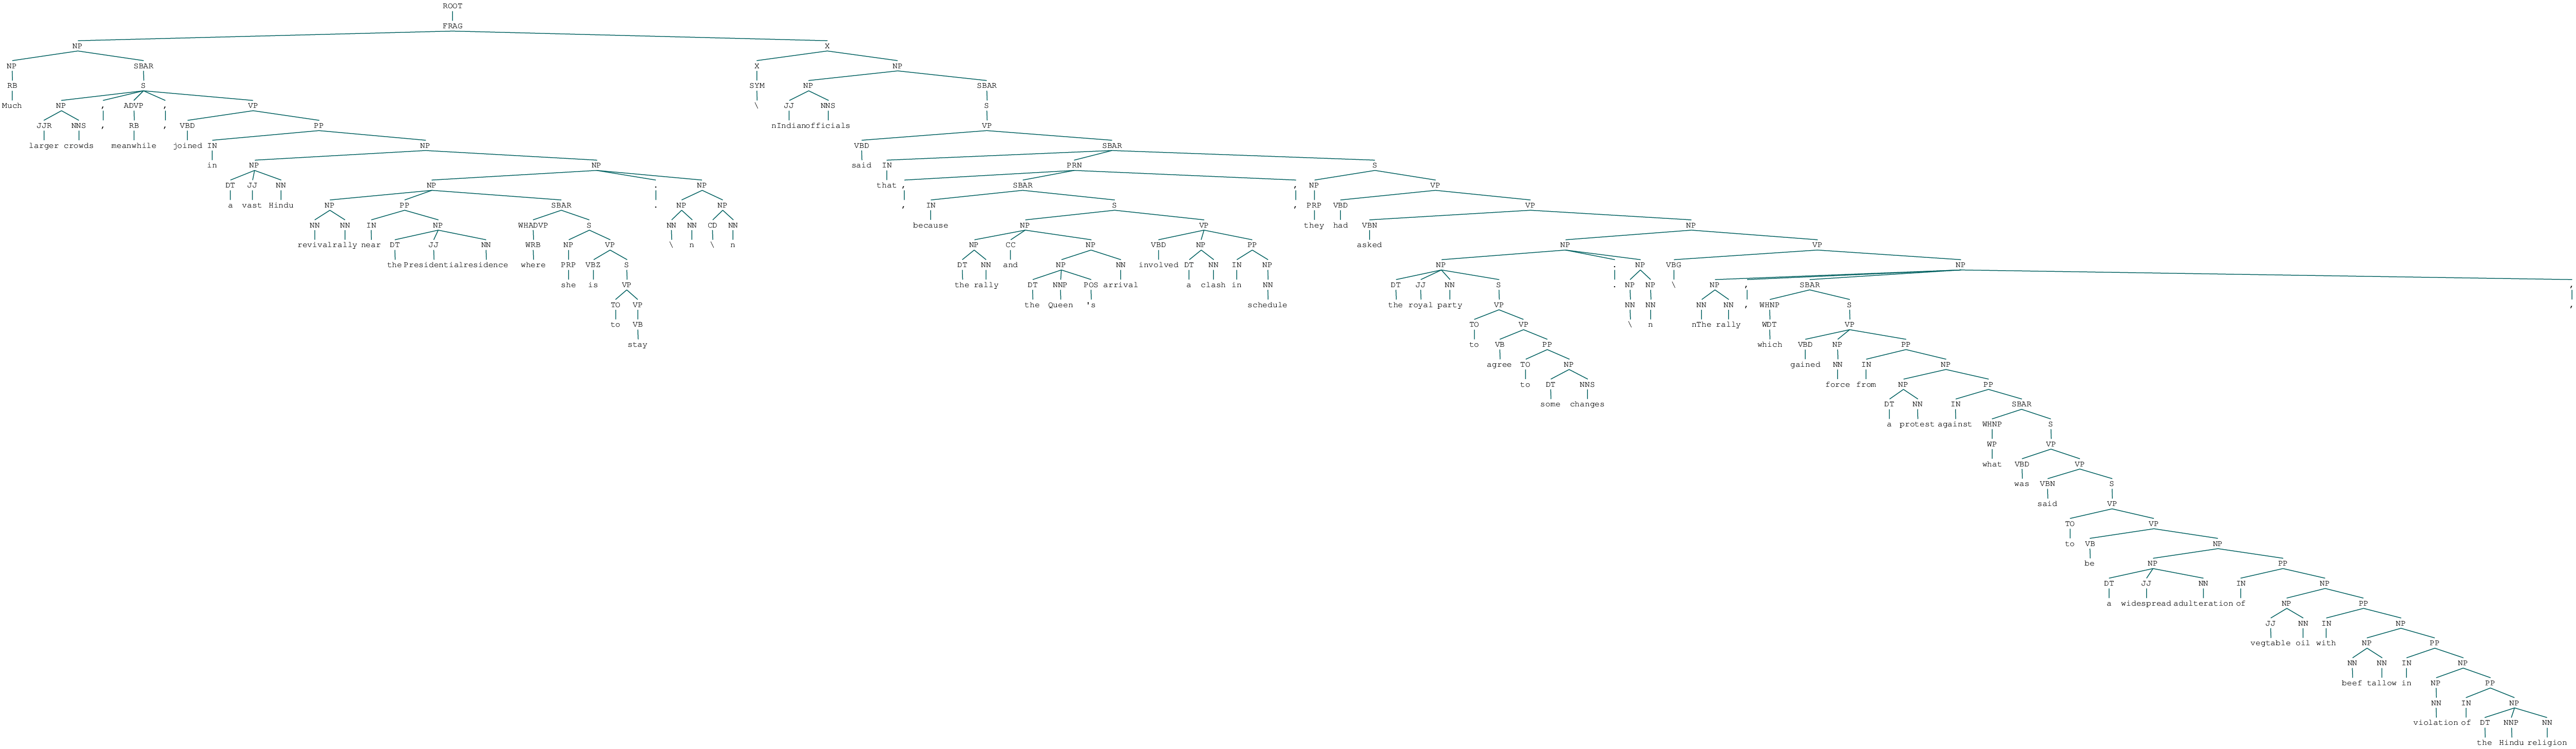

"Text = Much larger crowds, meanwhile, joined in a vast Hindu revival rally near the Presidential residence where she is to stay.\\n\\n\\nIndian officials said that, because the rally and the Queen's arrival involved a clash in schedule, they had asked the royal party to agree to some changes.\\n\\nThe rally, which gained force from a protest against what was said to be a widespread adulteration of vegtable oil with beef tallow in violation of the Hindu religion,"

'Code = 145'

'AID = 22540430'

4

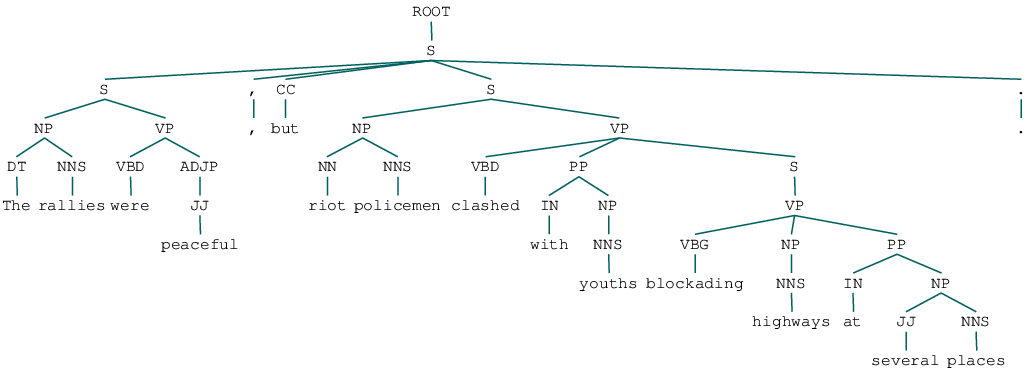

'Text = The rallies were peaceful, but riot policemen clashed with youths blockading highways at several places.'

'Code = 145'

'AID = 22609103'

5

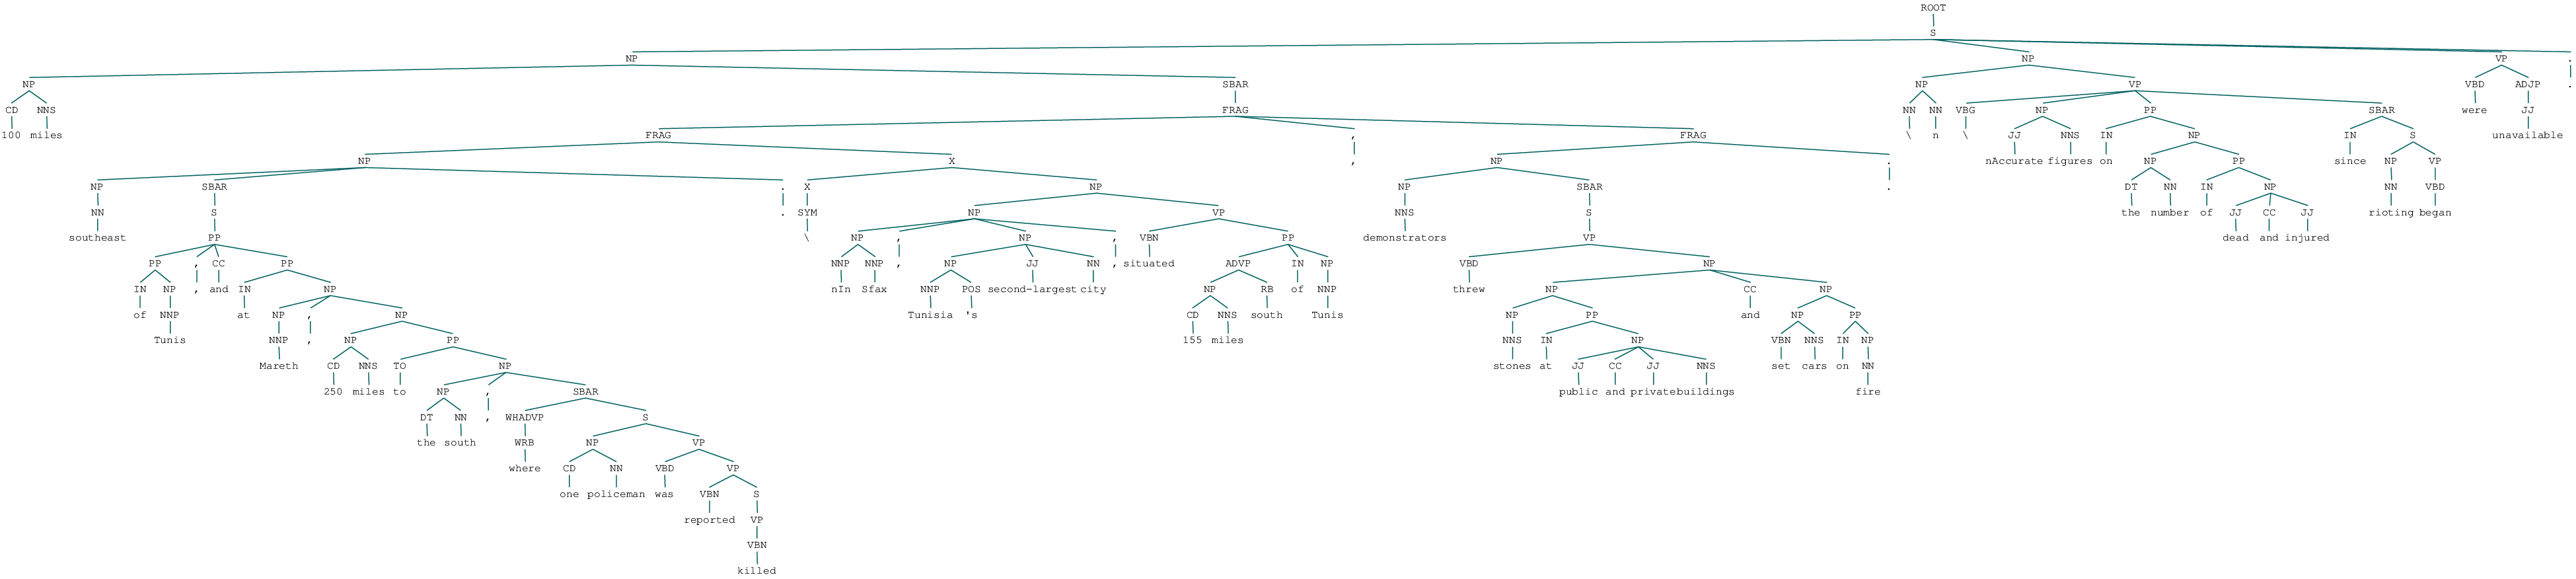

"Text =  100 miles southeast of Tunis, and at Mareth, 250 miles to the south, where one policeman was reported killed.\\nIn Sfax, Tunisia's second-largest city, situated 155 miles south of Tunis, demonstrators threw stones at public and private buildings and set cars on fire.\\n\\nAccurate figures on the number of dead and injured since rioting began were unavailable."

'Code = 145'

'AID = 22621011'

6

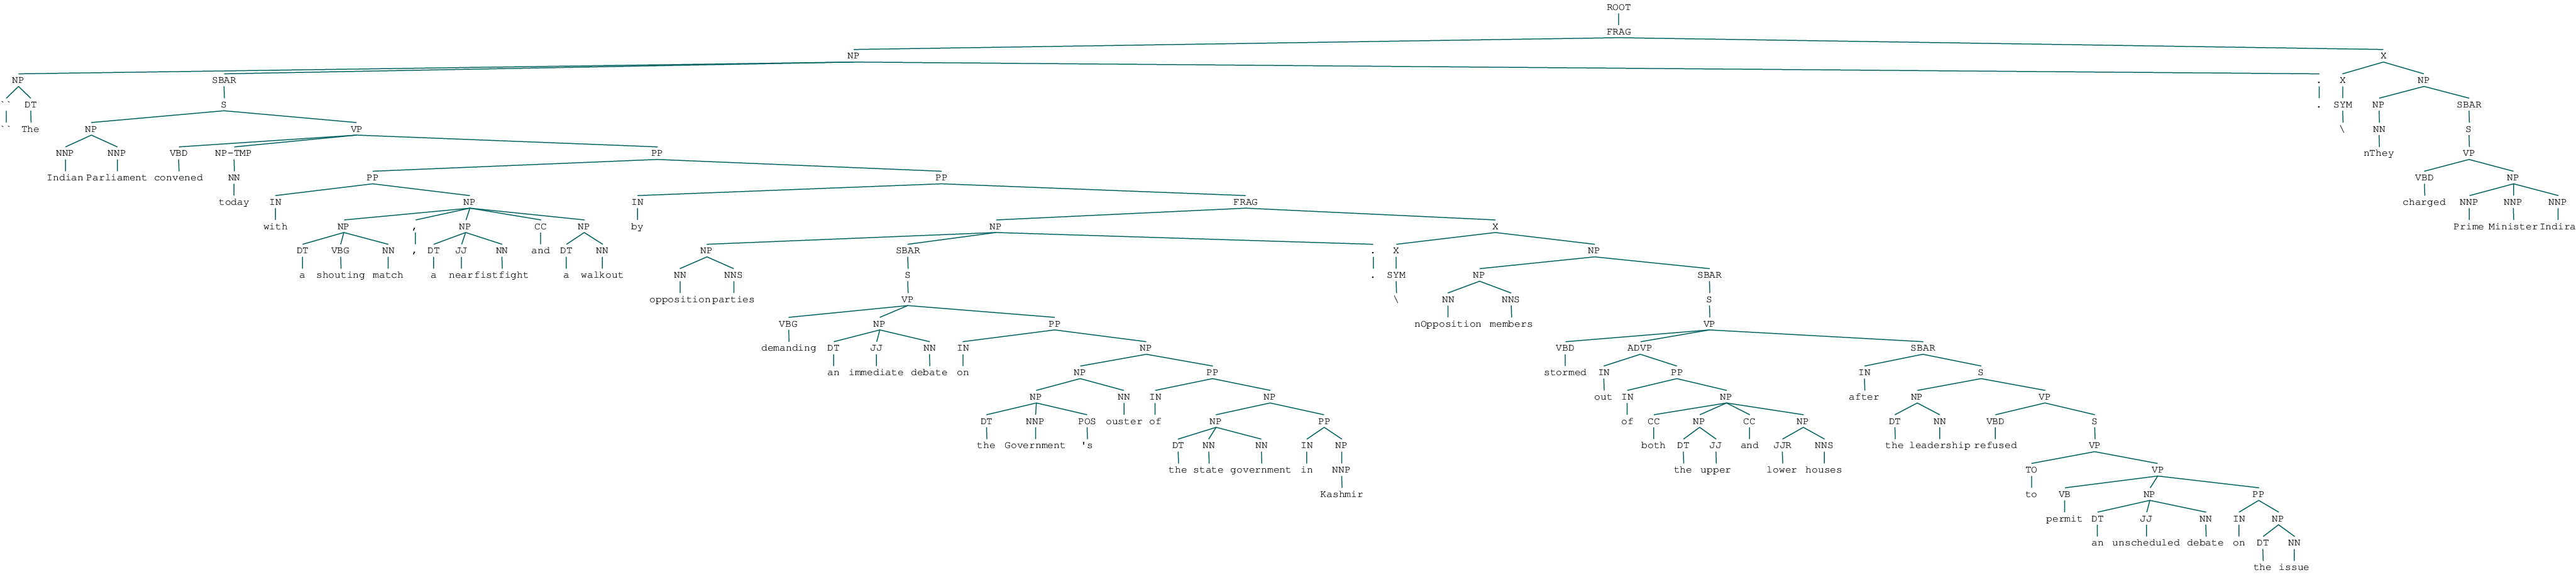

'Text = "The Indian Parliament convened today with a shouting match, a near fistfight and a walkout by opposition parties demanding an immediate debate on the Government\'s ouster of the state government in Kashmir.\\nOpposition members stormed out of both the upper and lower houses after the leadership refused to permit an unscheduled debate on the issue.\\nThey charged Prime Minister Indira '

'Code = 145'

'AID = 22646632'

7

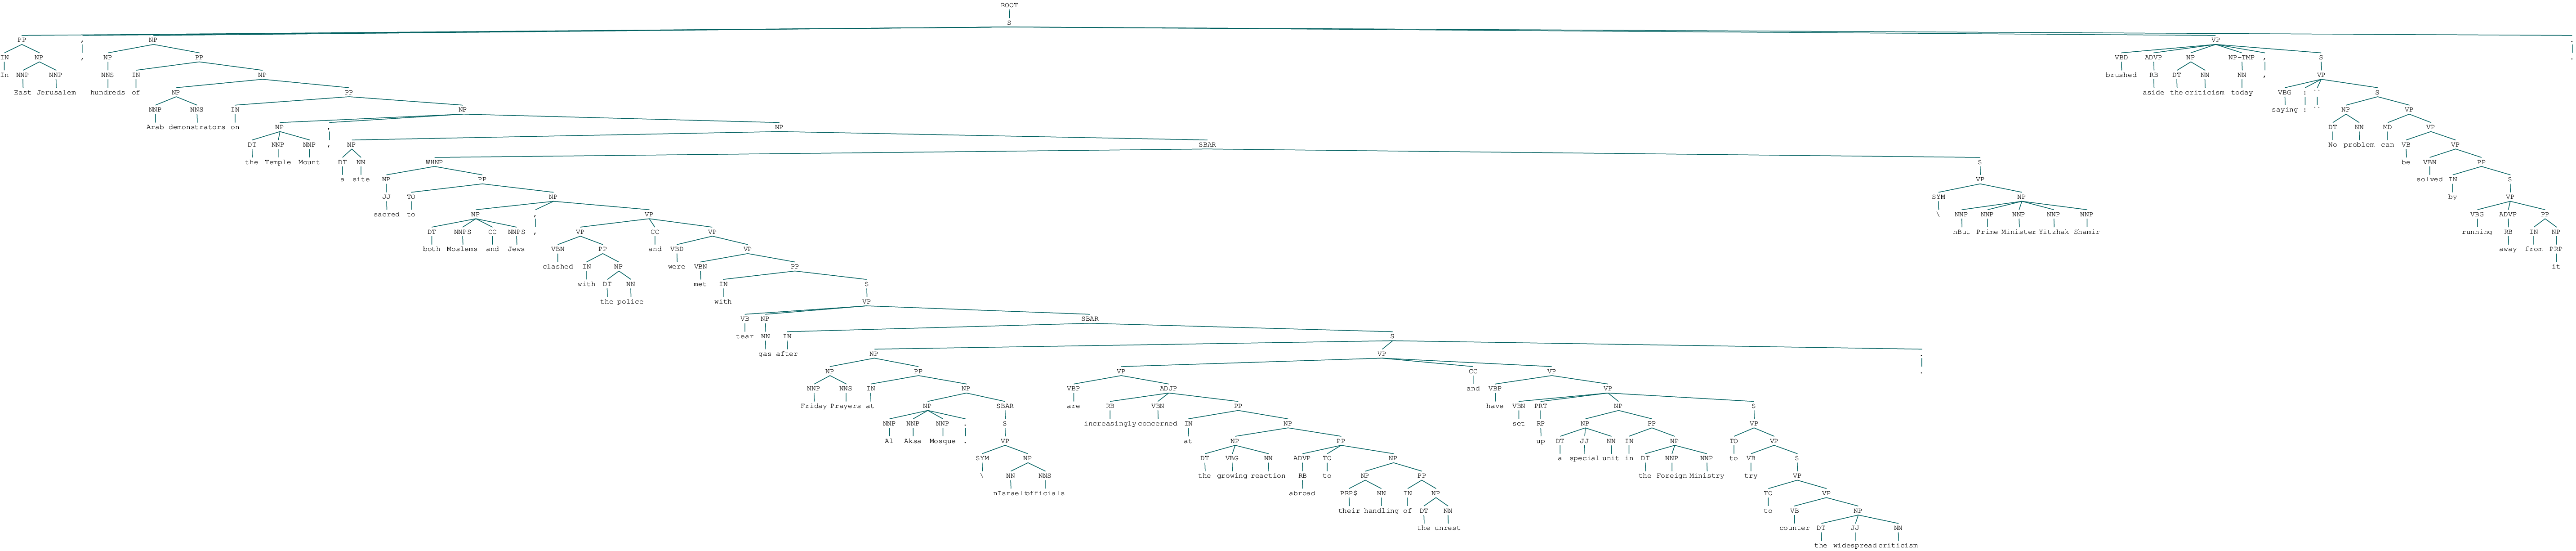

"Text = In East Jerusalem, hundreds of Arab demonstrators on the Temple Mount, a site sacred to both Moslems and Jews, clashed with the police and were met with tear gas after Friday Prayers at Al Aksa Mosque.\\nIsraeli officials are increasingly concerned at the growing reaction abroad to their handling of the unrest and have set up a special unit in the Foreign Ministry to try to counter the widespread criticism.\\nBut Prime Minister Yitzhak Shamir brushed aside the criticism today, saying: ''No problem can be solved by running away from it."

'Code = 145'

'AID = 22828852'

8

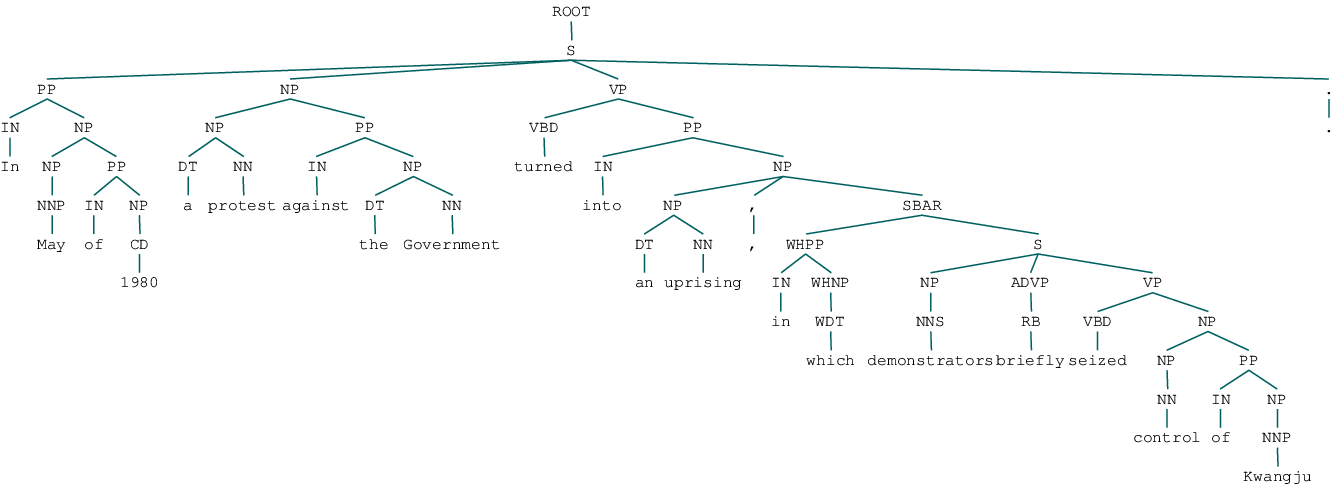

'Text = In May of 1980 a protest against the Government turned into an uprising, in which demonstrators briefly seized control of Kwangju.'

'Code = 145'

'AID = 22853018'

9

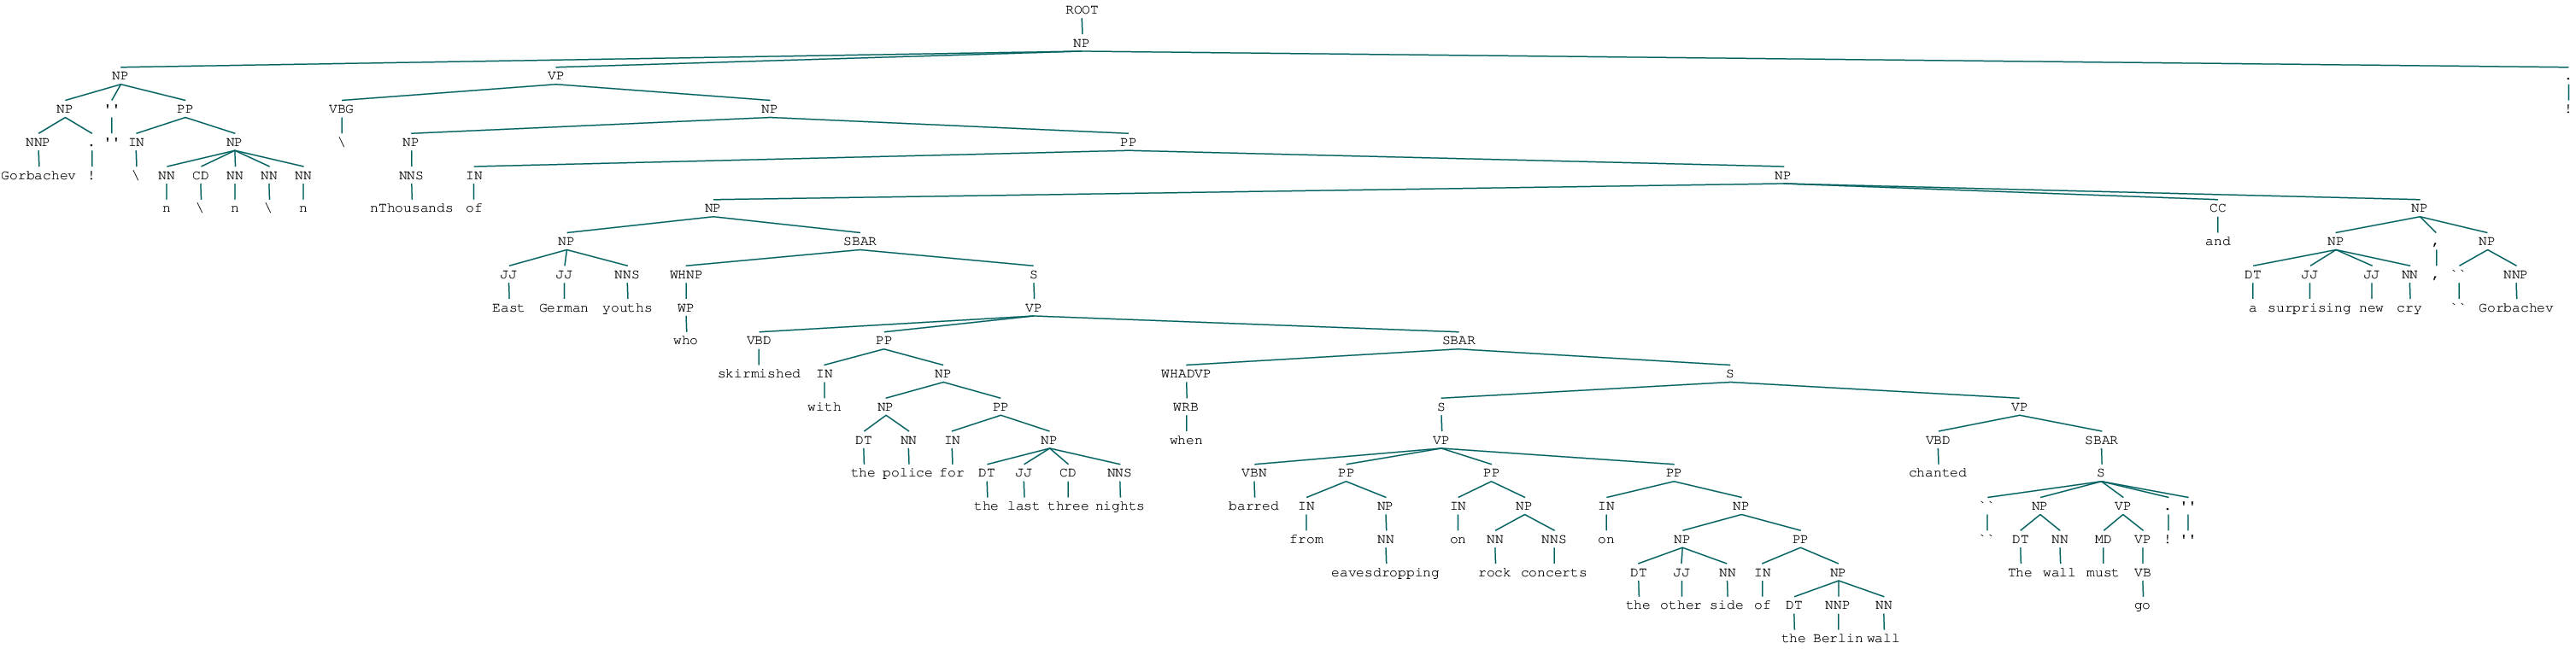

"Text = Gorbachev!''\\n\\n\\n\\nThousands of East German youths who skirmished with the police for the last three nights when barred from eavesdropping on rock concerts on the other side of the Berlin wall chanted ''The wall must go!'' and a surprising new cry, ''Gorbachev!"

'Code = 145'

'AID = 22854736'

10

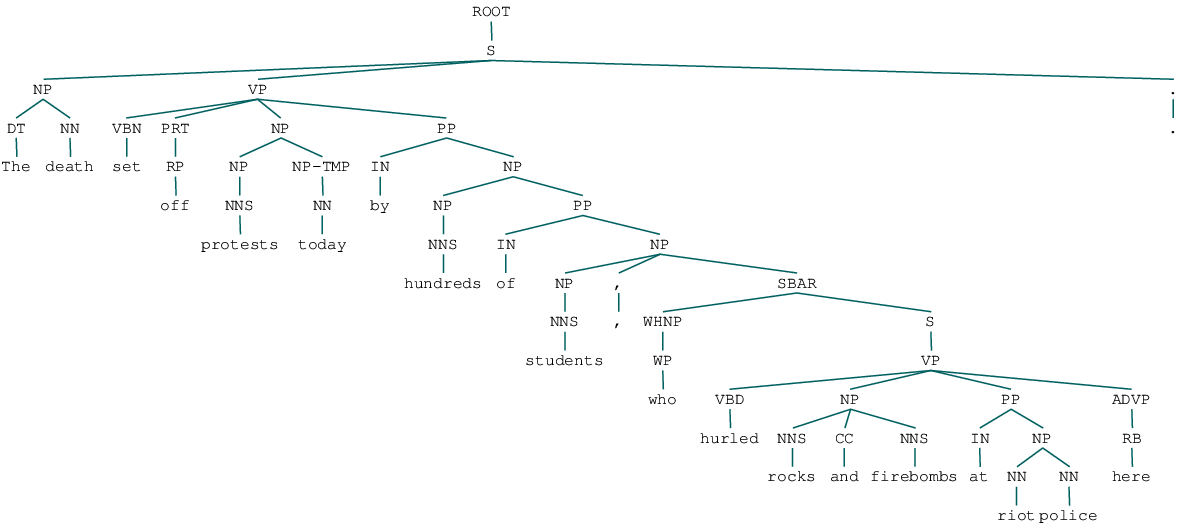

'Text = The death set off protests today by hundreds of students, who hurled rocks and firebombs at riot police here.'

'Code = 145'

'AID = 22923131'

11

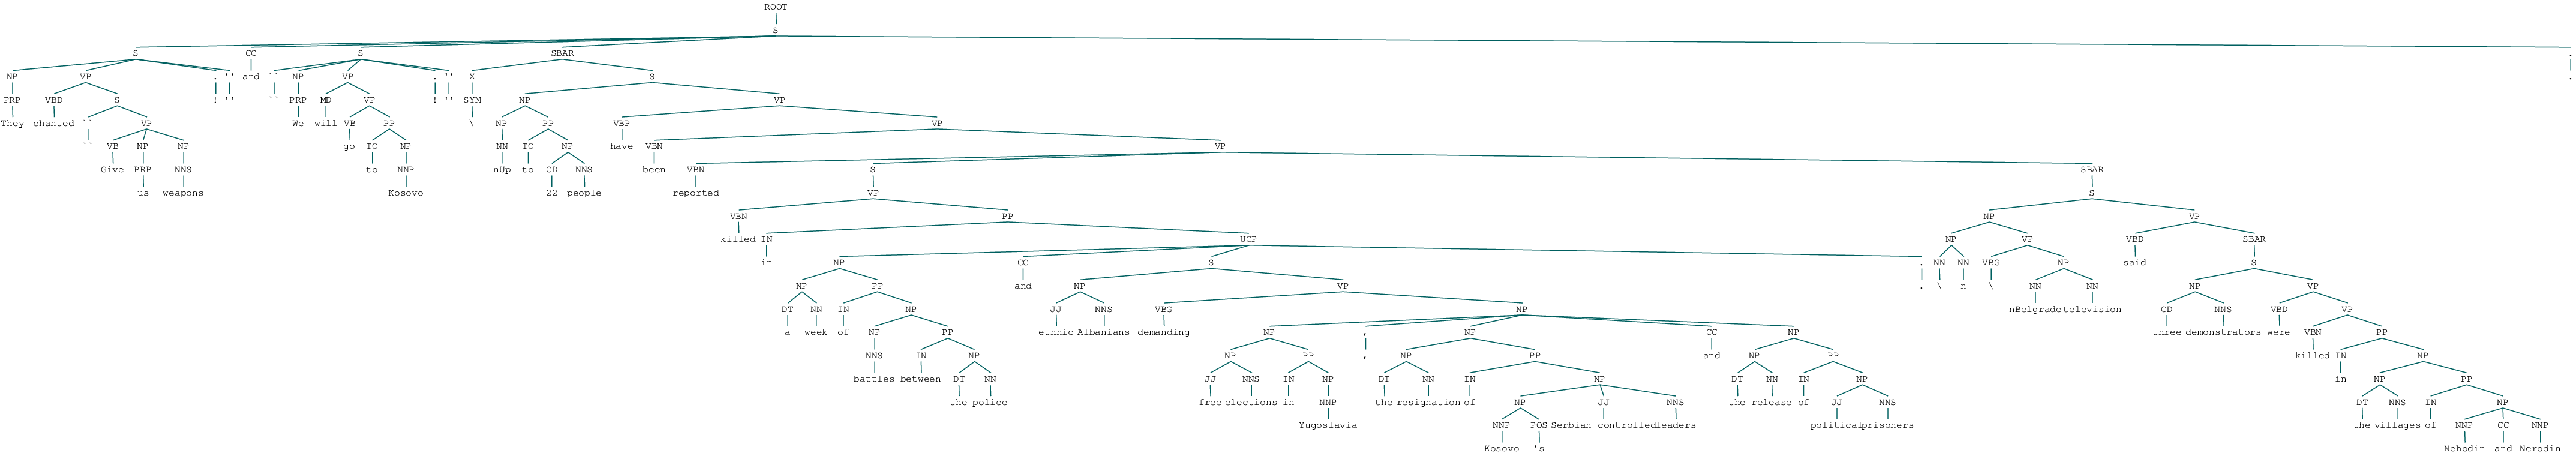

"Text = They chanted ''Give us weapons!'' and ''We will go to Kosovo!''\\nUp to 22 people have been reported killed in a week of battles between the police and ethnic Albanians demanding free elections in Yugoslavia, the resignation of Kosovo's Serbian-controlled leaders and the release of political prisoners.\\n\\nBelgrade television said three demonstrators were killed in the villages of Nehodin and Nerodin."

'Code = 145'

'AID = 23035004'

12

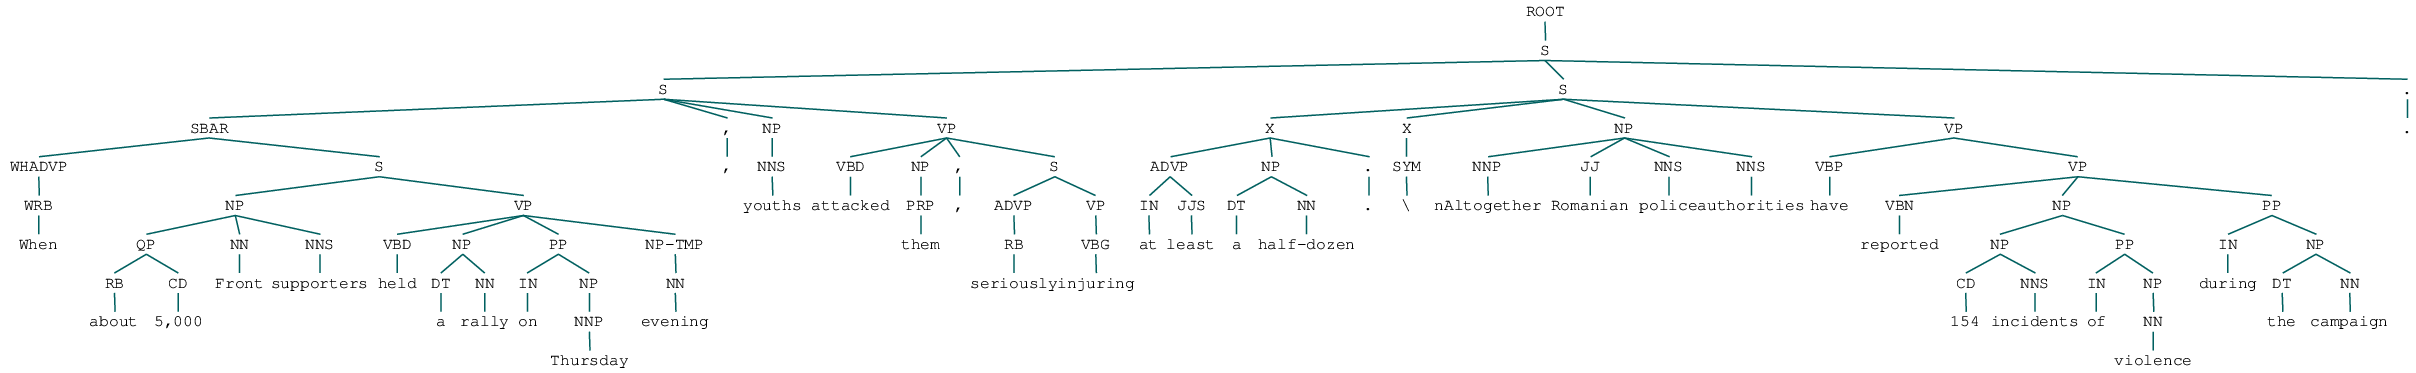

'Text = When about 5,000 Front supporters held a rally on Thursday evening, youths attacked them, seriously injuring at least a half-dozen.\\nAltogether Romanian police authorities have reported 154 incidents of violence during the campaign.'

'Code = 145'

'AID = 23090147'

13

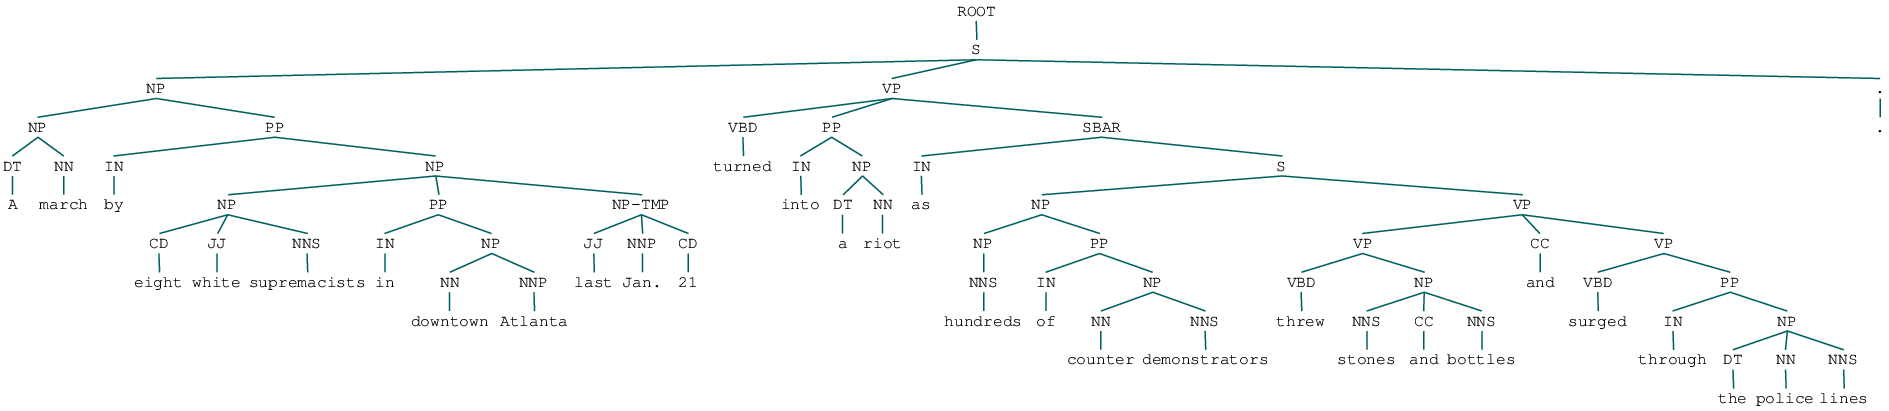

'Text = A march by eight white supremacists in downtown Atlanta last Jan. 21 turned into a riot as hundreds of counter demonstrators threw stones and bottles and surged through the police lines.'

'Code = 145'

'AID = 23094979'

14

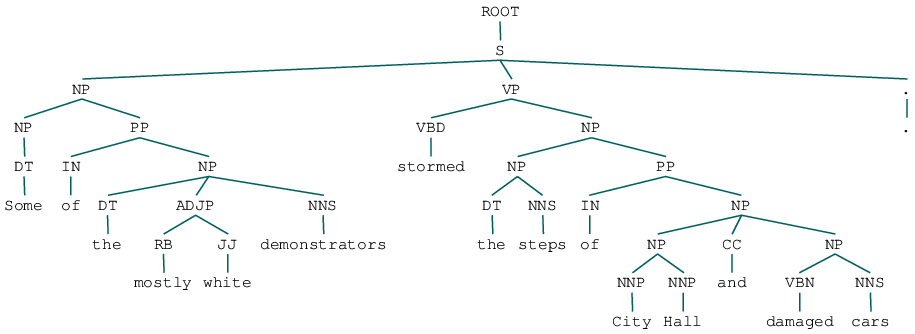

'Text = Some of the mostly white demonstrators stormed the steps of City Hall and damaged cars.'

'Code = 145'

'AID = 23299143'

15

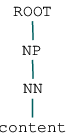

'Text = content\r"Just a few hours before the Olympic torch was lighted in Centennial Olympic Stadium, about 50 people gathered to set fire to the Georgia state flag.\\nProtesters led by the Rev. Hosea L. Williams marched from the grave site of Martin Luther King Jr. to the steps of the Capitol this evening and set fire to the flag, which is dominated by the stars and bars of the Confederacy.'

'Code = 145'

'AID = 23506913'

16

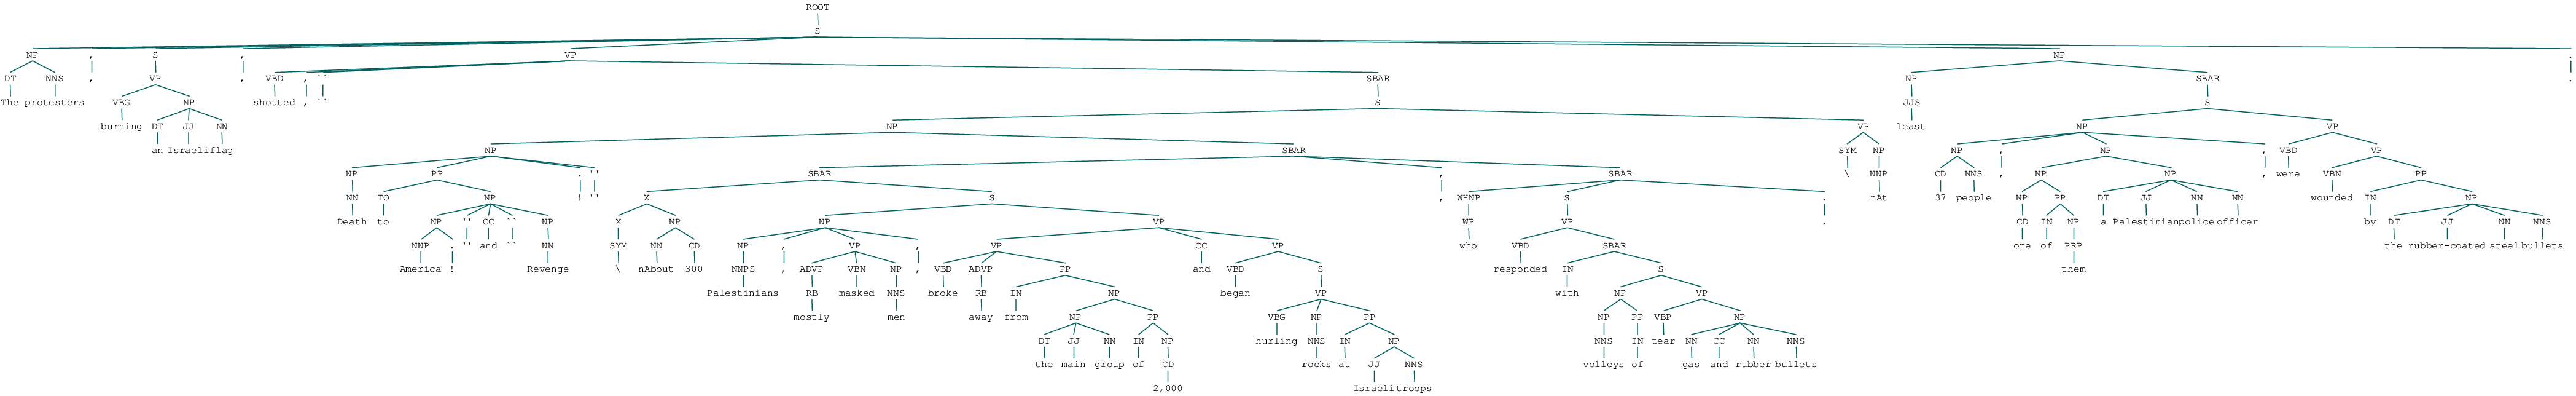

"Text = The protesters, burning an Israeli flag, shouted, ''Death to America!'' and ''Revenge!''\\nAbout 300 Palestinians, mostly masked men, broke away from the main group of 2,000 and began hurling rocks at Israeli troops, who responded with volleys of tear gas and rubber bullets.\\nAt least 37 people, one of them a Palestinian police officer, were wounded by the rubber-coated steel bullets."

'Code = 145'

'AID = 23556489'

17

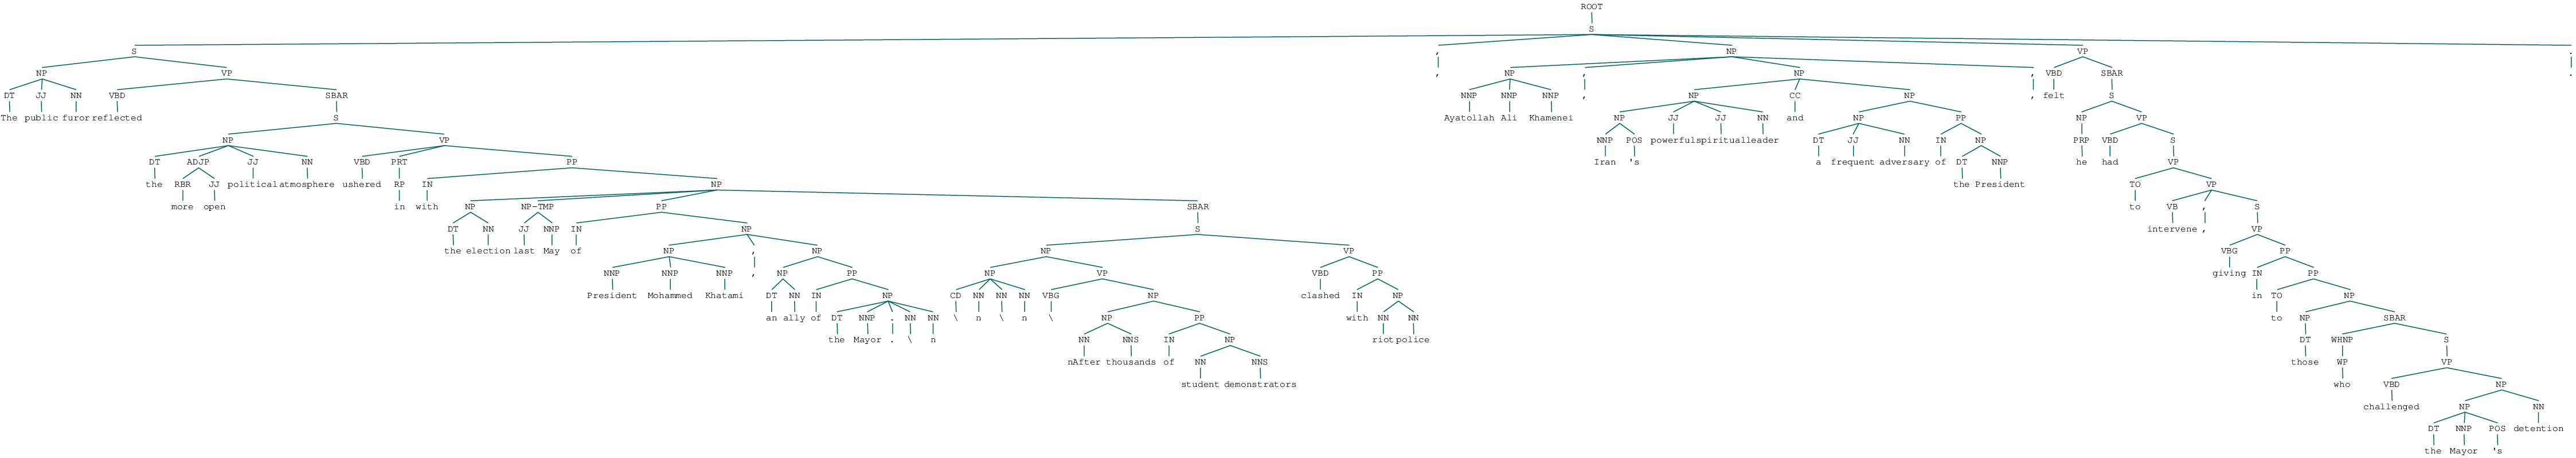

"Text = The public furor reflected the more open political atmosphere ushered in with the election last May of President Mohammed Khatami, an ally of the Mayor.\\n\\n\\n\\nAfter thousands of student demonstrators clashed with riot police, Ayatollah Ali Khamenei, Iran's powerful spiritual leader and a frequent adversary of the President, felt he had to intervene, giving in to those who challenged the Mayor's detention."

'Code = 145'

'AID = 23606355'

18

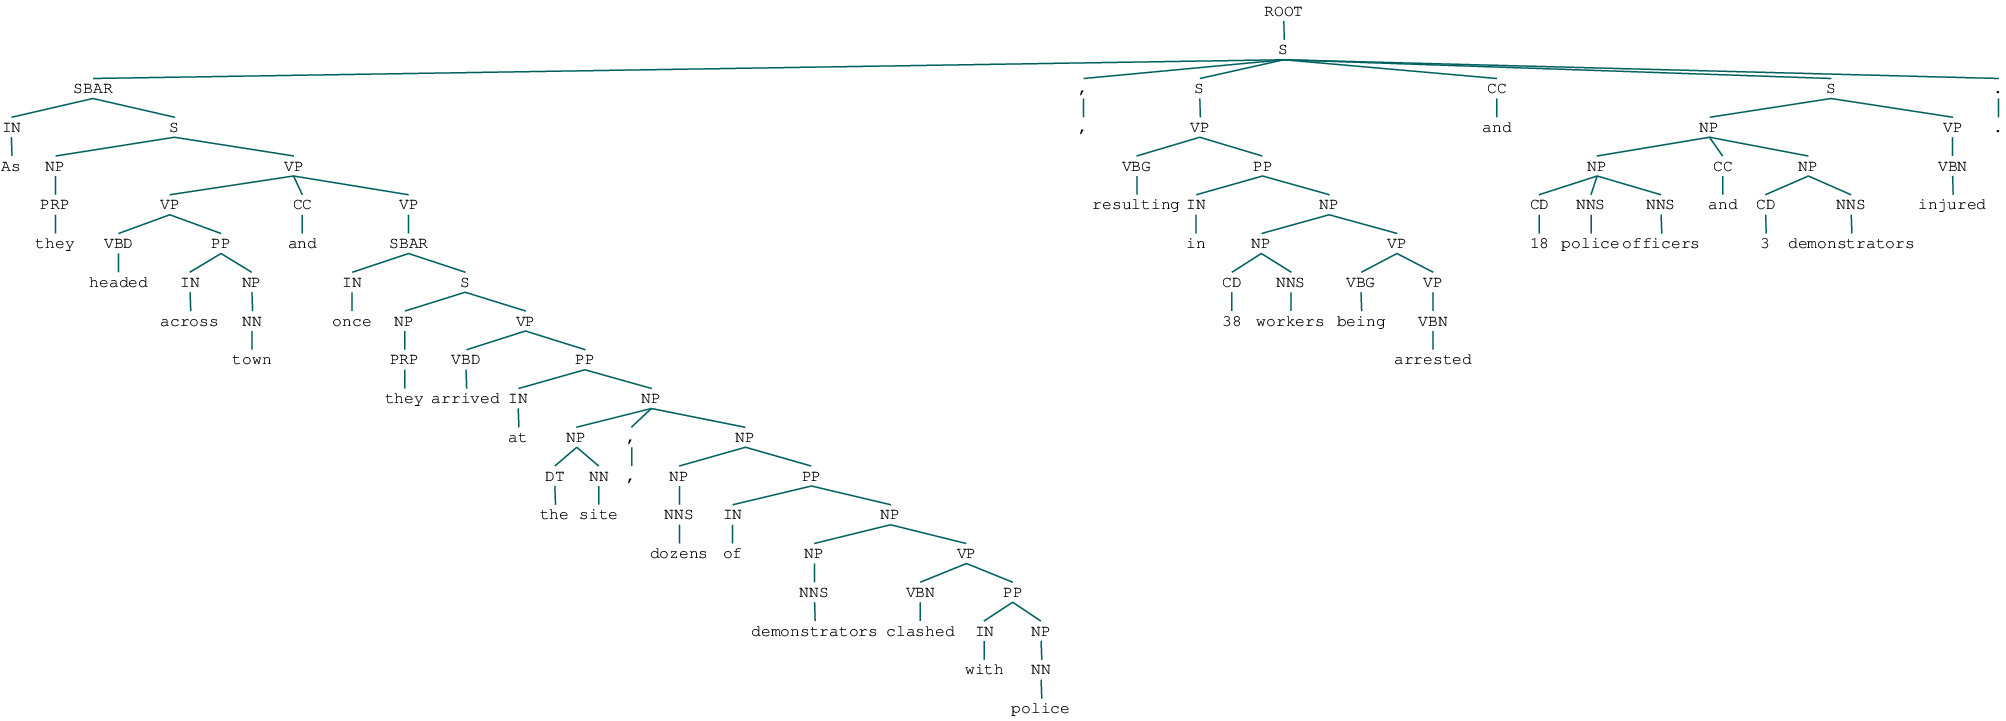

'Text = As they headed across town and once they arrived at the site, dozens of demonstrators clashed with police, resulting in 38 workers being arrested and 18 police officers and 3 demonstrators injured.'

'Code = 145'

'AID = 23612962'

19

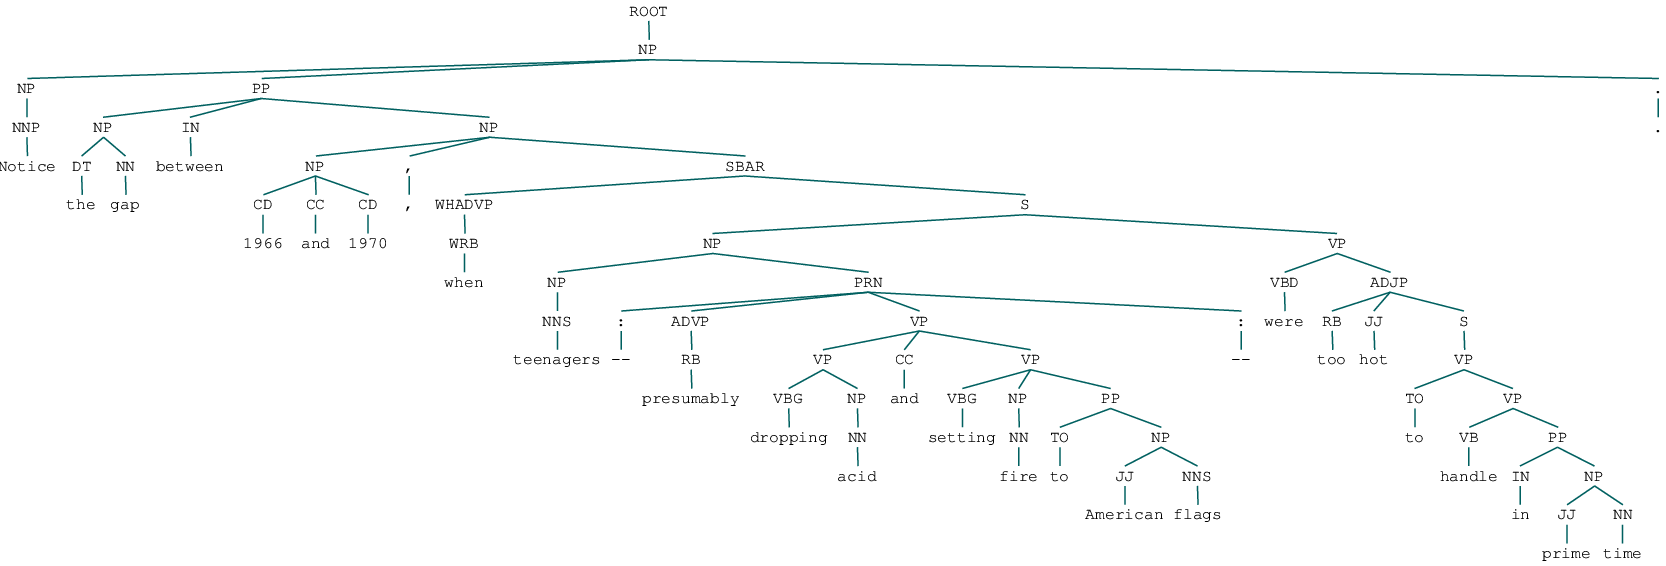

'Text = Notice the gap between 1966 and 1970, when teenagers -- presumably dropping acid and setting fire to American flags -- were too hot to handle in prime time.'

'Code = 145'

'AID = 23748256'

20

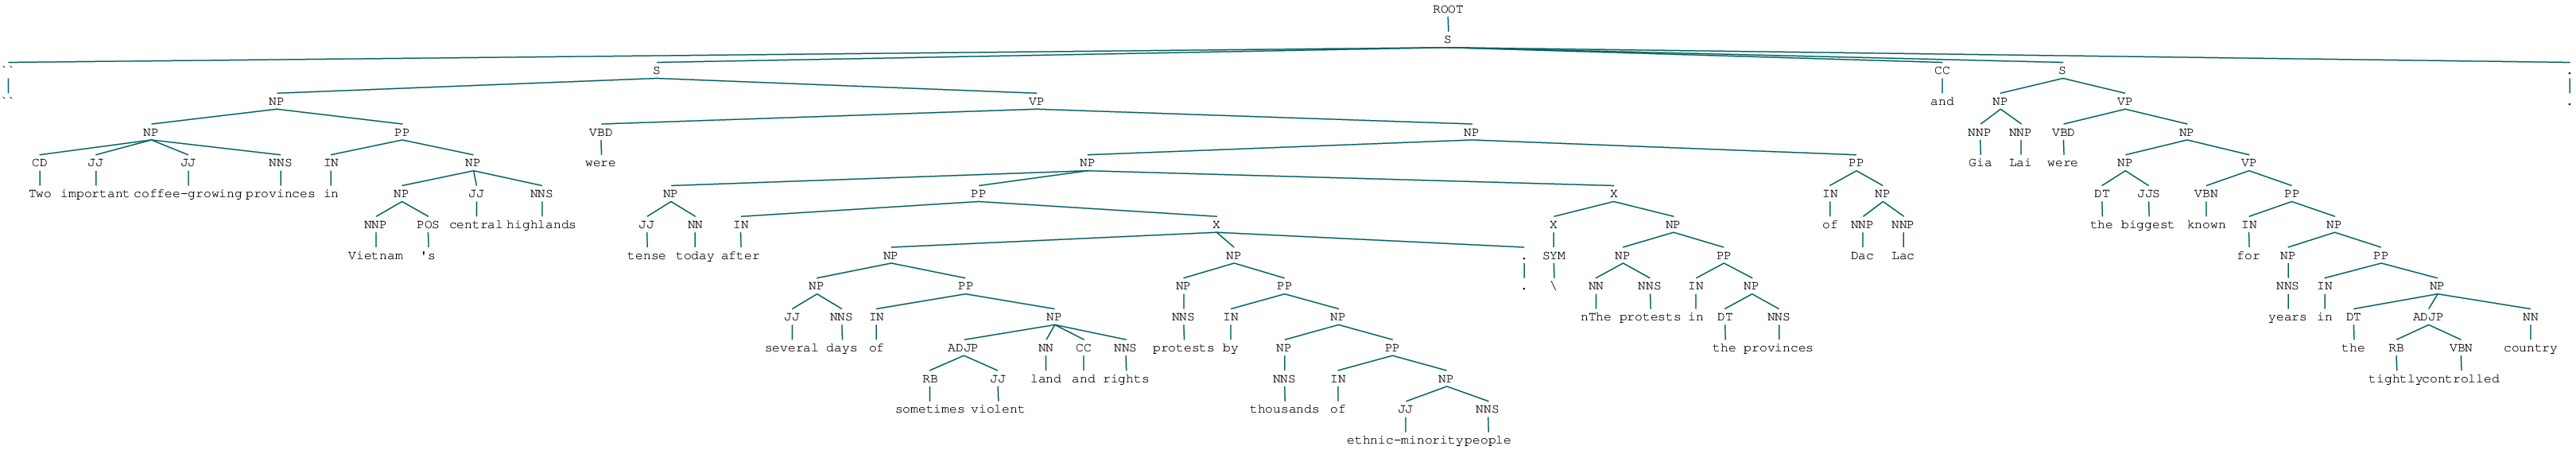

'Text = "Two important coffee-growing provinces in Vietnam\'s central highlands were tense today after several days of sometimes violent land and rights protests by thousands of ethnic-minority people.\\nThe protests in the provinces of Dac Lac and Gia Lai were the biggest known for years in the tightly controlled country.'

'Code = 145'

'AID = 23778449'

21

In [24]:
for i in range(len(accent3_145)):
    parsed_output(accent3_145, i)
    display(i)

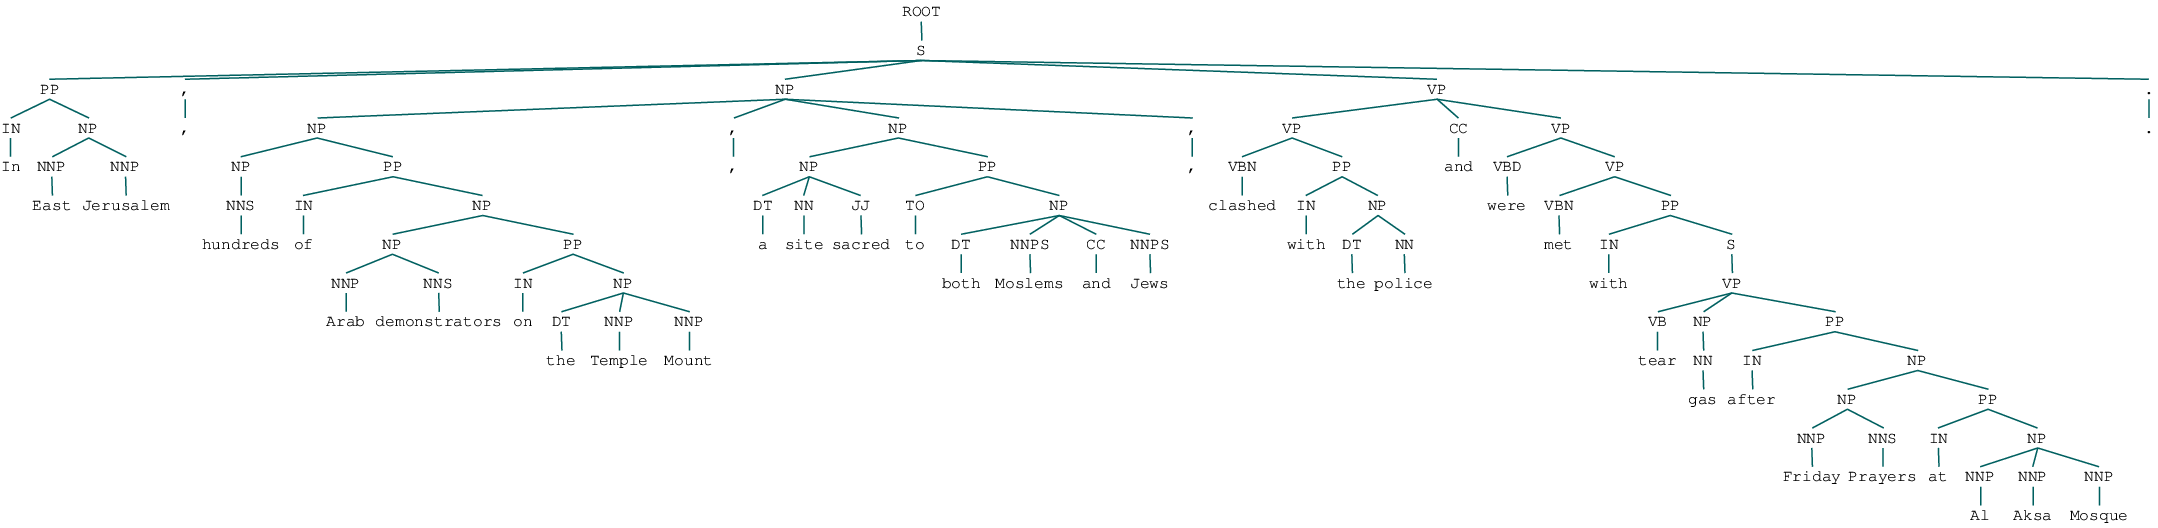

In [30]:
one_sentence_parser("In East Jerusalem, hundreds of Arab demonstrators on the Temple Mount, a site sacred to both Moslems and Jews, clashed with the police and were met with tear gas after Friday Prayers at Al Aksa Mosque.")

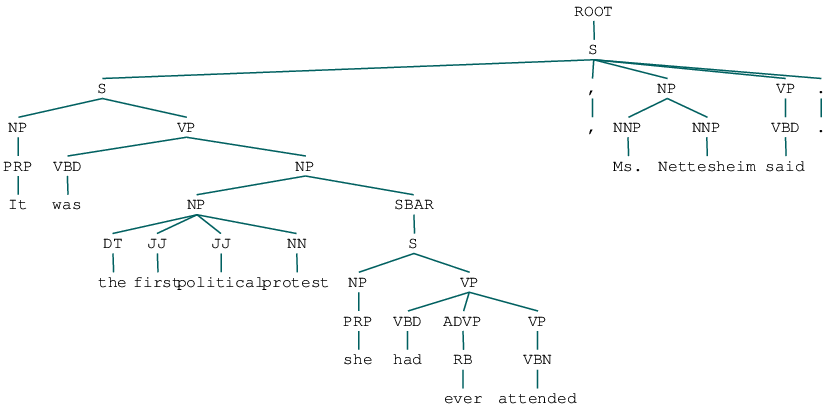

In [30]:
one_sentence_parser("It was the first political protest she had ever attended, Ms. Nettesheim said.")